# COMP30760 ASSIGNMENT 2
By Brian Byrne (18391933)

This is a visualization and analysis of data collected from Google's COVID-19 Community Mobility Reports (accessed from http://mlg.ucd.ie/modules/COMP30760/mobility.html ). The datasets show a precentage change in the amount of national movement at 6 different location category types (retail and recreation, grocery and pharmacy, parks, transit stations, workplaces, residential) during the COVID-19 pandemic versus movement from before the pandemic (represented by a baseline at 0). For the purpose of the assignment I decided to use the data of the following countries to draw interesting and comparable insights after careful consideration:
* <b>Ireland</b>- Relevant to me as I am a resident and I would like to see how the implementation of two lockdowns effected movement in the counrty.
* <b>Sweden</b>- Like Ireland, Sweden is an EU Country that has decided in favour of a "Life must go on" policy. It will be interesting to see what effect this policy has on movement. Sweden also has a Scandinavian, cool climate which may also influence movement.
* <b>New Zealand</b>- Like Ireland, New Zealand also went into lockdown. However after closing borders for the pandemic, New Zealand have decided to revert back to Level 1 restrictions, reopening the entire country and lifting restrictions, with the only requirement being that people must still make details available for possible contact tracing.

In [2]:
#importing of various relevant packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline 

# Part 1: The Individual Countries

# 1(a) Ireland

## Loading of Irish Data
Loading the <b>Irish CSV Dataset</b>  for cleaning and filtering.

In [3]:
# Reading in the Irish CSV as a timeseries dataframe
df_ireland=pd.read_csv("ireland.csv", index_col="date", parse_dates=True)
df_ireland.head()

id  country  \
date                           
2020-03-01  1265158  Ireland   
2020-03-02  1265159  Ireland   
2020-03-03  1265160  Ireland   
2020-03-04  1265161  Ireland   
2020-03-05  1265162  Ireland   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                                3.0    
2020-03-02                                                4.0    
2020-03-03                                                8.0    
2020-03-04                                                5.0    
2020-03-05                                                4.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                3.0   
2020-03-02                                                4.0   
2020-03-03                                                5.0   
2020-03-04                                                4.0   
2020-03-05                                                4.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -5.0   
2020-03-02                                12.0   
2020-03-03                                29.0   
2020-03-04                                25.0   
2020-03-05                                15.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            2.0   
2020-03-02                                            1.0   
2020-03-03                                            2.0   
2020-03-04                                            1.0   
2020-03-05                                            0.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      2.0   
2020-03-02                                      1.0   
2020-03-03                                      3.0   
2020-03-04                                      1.0   
2020-03-05                                      2.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       0.0  
2020-03-02                                       0.0  
2020-03-03                                      -1.0  
2020-03-04                                       0.0  
2020-03-05                                       0.0

In [4]:
df_ireland.tail()

id  country  \
date                           
2020-10-27  1265398  Ireland   
2020-10-28  1265399  Ireland   
2020-10-29  1265400  Ireland   
2020-10-30  1265401  Ireland   
2020-10-31  1265402  Ireland   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-10-27                                              -45.0    
2020-10-28                                              -49.0    
2020-10-29                                              -51.0    
2020-10-30                                              -48.0    
2020-10-31                                              -58.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-10-27                                                0.0   
2020-10-28                                               -5.0   
2020-10-29                                               -6.0   
2020-10-30                                                1.0   
2020-10-31                                               -2.0   

            parks_percent_change_from_baseline  \
date                                             
2020-10-27                                20.0   
2020-10-28                                 8.0   
2020-10-29                               -25.0   
2020-10-30                                24.0   
2020-10-31                               -17.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-10-27                                          -56.0   
2020-10-28                                          -58.0   
2020-10-29                                          -61.0   
2020-10-30                                          -56.0   
2020-10-31                                          -58.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-10-27                                    -50.0   
2020-10-28                                    -49.0   
2020-10-29                                    -50.0   
2020-10-30                                    -48.0   
2020-10-31                                    -27.0   

            residential_percent_change_from_baseline  
date                                                  
2020-10-27                                      18.0  
2020-10-28                                      19.0  
2020-10-29                                      21.0  
2020-10-30                                      19.0  
2020-10-31                                      13.0

## Data Preprocessing
Necessary cleaning and filtering of irreleavnt data. The baseline dataframe will enable us to plot the baseline on data visualizations.

In [5]:
#Removes the ID column
def removeId(df):
    del df["id"]  

In [6]:
removeId(df_ireland)

In [7]:
#creating a baseline dataframe for visualization 
dates=df_ireland.index[0:-1]
baseline_zeroes=[]
for i in dates:
    baseline_zeroes.append(0)

baseline_df=pd.Series(baseline_zeroes, index=dates)


In [8]:
# Dates ofIrish lockdowns
first_irish_lockdown=["2020-03-15","2020-05-18"]
second_irish_lockdown=["2020-10-21","2020-12-1"]

# Irish Functions
Functions used for the enhanced visulaization of Irish data.

In [9]:
#Used to plot a single variable on a detailled linegraph
def irishLineGraph(dataFrame, heading):
    ax=dataFrame.plot(figsize=(15,10),fontsize=20,color="blue")
    ax.set_title(heading,fontsize=30, color="darkgreen")
    ax.text("2020-04-20",dataFrame.mean(),"First Lockdown",rotation=90,fontsize=15)
    ax.text("2020-10-26",dataFrame.mean(),"Second Lockdown",rotation=90,fontsize=15)
    ax.text("2020-06-20",1,"BASELINE",color="r")
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('% change from baseline', fontsize=24,color="blue")
    fig=baseline_df.plot(ax=ax, color="r")
    fig.legend([heading,"Baseline"])
    plt.axvspan(first_irish_lockdown[0],first_irish_lockdown[1] , color="palegreen", alpha=0.5)
    plt.axvspan(second_irish_lockdown[0],second_irish_lockdown[1] , color="palegreen", alpha=0.5)
    plt.grid()
    plt.show()

In [10]:
#prints average percentage change of dataframe
def printAvg(dataFrame, heading):
    print("{} Mean: {}%".format(heading,round(dataFrame.mean(),2)))

In [11]:
# comparitive function used to plot multiple variables at a time.
def irishComparitiveLineGraph(df, heading):
    ax = df.plot(figsize=(15, 10), fontsize=14, color=["magenta", "blue","darkorange","dimgray","deepskyblue","darkgoldenrod","aqua"])
    ax.set_title(heading,fontsize=30, color="darkgreen")
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('% change from baseline', fontsize=24,color="blue")
    fig=baseline_df.plot(ax=ax, color="r")
    plt.axvspan(first_irish_lockdown[0],first_irish_lockdown[1] , color="palegreen", alpha=0.5)
    plt.axvspan(second_irish_lockdown[0],second_irish_lockdown[1] , color="palegreen", alpha=0.5)
    plt.grid()
    plt.show()


In [12]:
#Returns a dataframe, indexed by month that displays aggregated percentages for each month
def aggByMonth(df):
    return df.groupby(df.index.month).sum()

In [13]:
#Returns a dataframe, indexed by month that displays the mean percentages for each month
def meanByMonth(df):
    return df.groupby(df.index.month).mean()

In [14]:
#Simply indexes a dataframe by month
def byMonth(df):
    return df.groupby(df.index.month).mean()

In [15]:
#Function that shows a given dataframe as a barchart
def irishBarchart(df, heading):
    p = df.plot.barh(figsize=(15, 10), fontsize=14)
    p.set_title(heading, fontsize=30, color="darkorchid")
    p.set_xlabel('% change from baseline', fontsize=24,color="blue")
    p.set_ylabel('Months', fontsize=24,color="blue")
    p.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

# Retail and Recreation


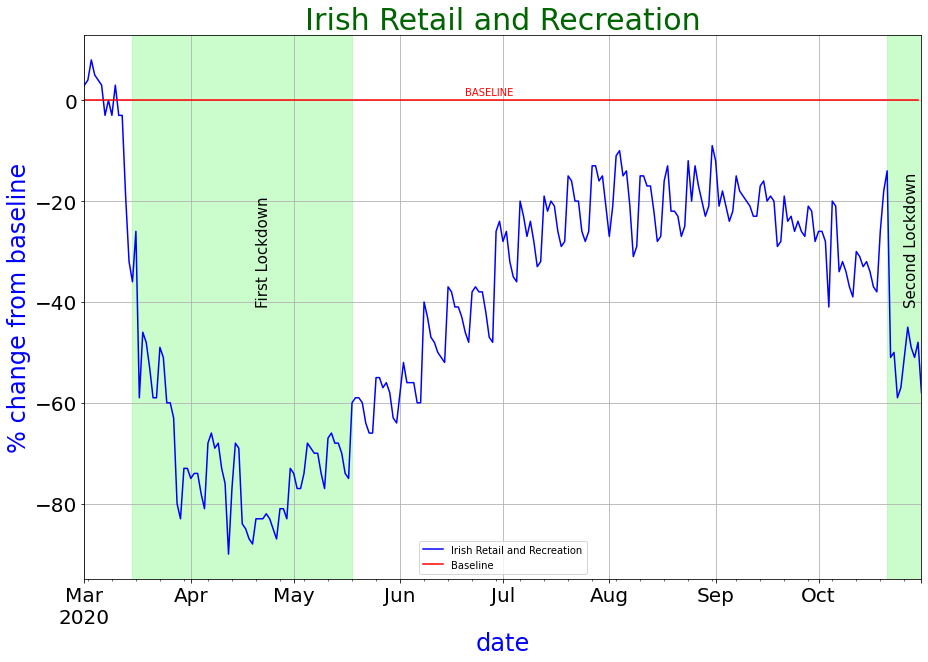

Irish Retail and Recreation Mean: -40.5%


In [16]:
irish_retail_df=df_ireland["retail_and_recreation_percent_change_from_baseline"]
irishLineGraph(irish_retail_df,"Irish Retail and Recreation" )
printAvg(irish_retail_df,"Irish Retail and Recreation")

The occurance of the first Irish lockdown appears to have greatly decreased the amount of people shopping for non-essential products and using services like cinemas and restraunts for leisure. This is nearly certainly due to the fact that the majority of these services were altered so that they had to operate where they could only operate at minimum capacity or shut down completley to abide with the legislation of the Irish government. A sharp increase can be seen at the end of the first lockdown, possibly due to the desire of people to use these anemities after a prolonged abscence. However, it is likely movement levels did not return to regular levels due to restricted numbers and the remaining closure of large events like sports stadia, concerts and nightclubs. The closure of these facitlies in the second lockdown has undoubtedly led to the drop in usage as in the first lockdown.

# Supermarket and Pharmacy

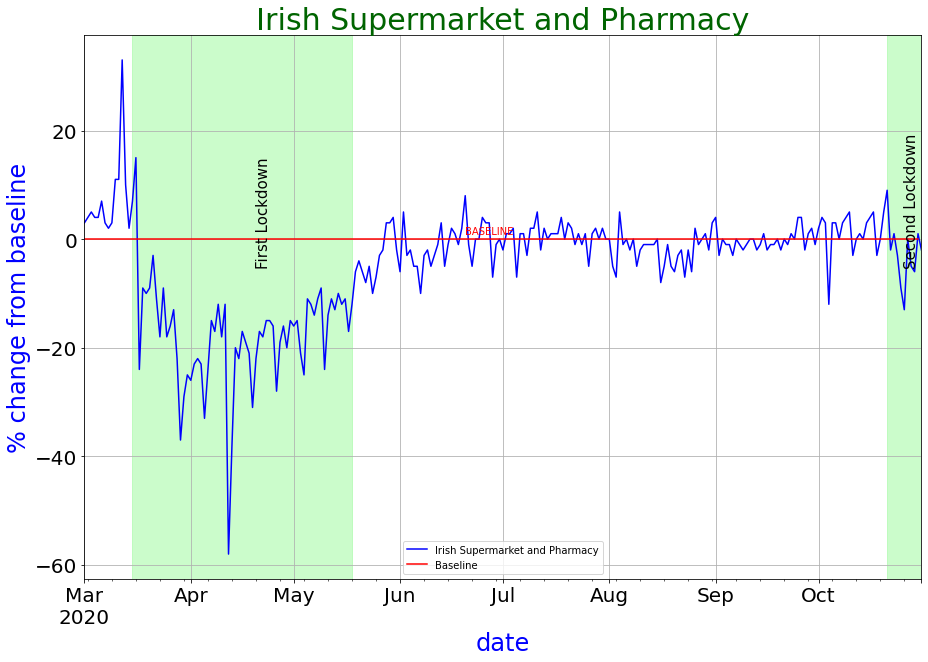

Irish Supermarket and Pharmacy Mean: -4.8%


In [17]:
irish_grocery_df=df_ireland["grocery_and_pharmacy_percent_change_from_baseline"]
irishLineGraph(irish_grocery_df,"Irish Supermarket and Pharmacy")
printAvg(irish_grocery_df,"Irish Supermarket and Pharmacy")

The use of supermarkets and pharmacies has only declined slighlty from the usual rate, as they have remained open due to their status of essential services. The decline in the first lockdown could be due to the fact of uncertainty and hesitancy which led at the start of the lockdown which led many peoplr to buy in large quantities, evident by the empty shelves in supermarkets. Buying in large qunatities usually reduces the frequency a person would have to visit supermarkets. We can see a small rise in usage as we approach the Autumn months, as other illnesses and sicknesses generally increase, leading to increased pharmacy needs.

# Parks

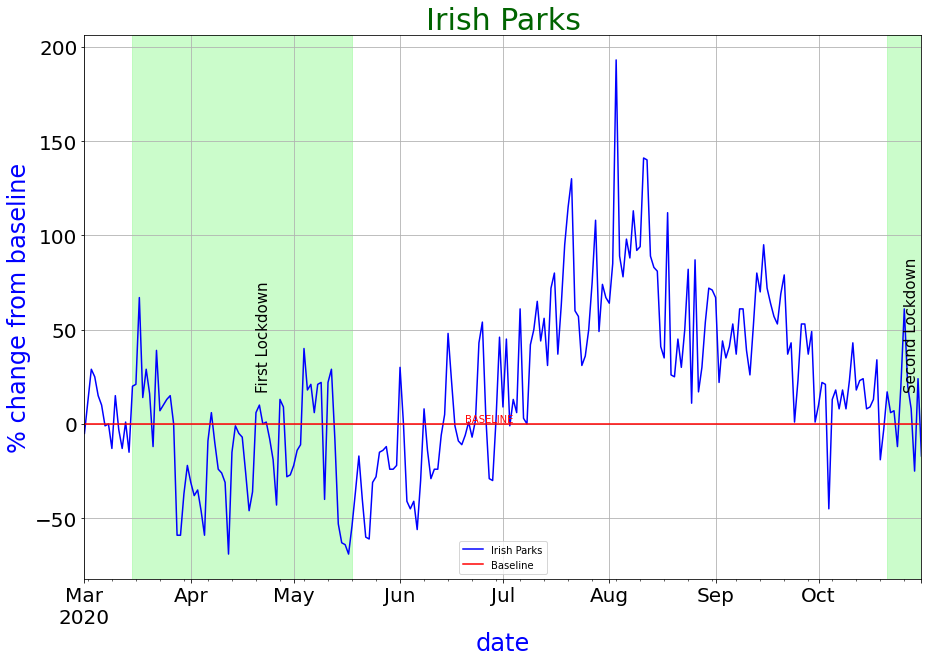

Irish Parks Mean: 18.59%


In [18]:
irish_parks_df=df_ireland["parks_percent_change_from_baseline"]
irishLineGraph(irish_parks_df,"Irish Parks")
printAvg(irish_parks_df,"Irish Parks")

Mobilitiy in Irish Parks has increased healthily, probably due to the reduced amount of other leisure activities. We see an expected rise in Summer, clearly due to the general improvement of weathe during the summer months. Lockdown seemed to not have too much of an effect on park usage, with some days even showing increased park visits, possibly due to the use of parks to compensate for the closure of gyms and sporting facilities.

# Transit

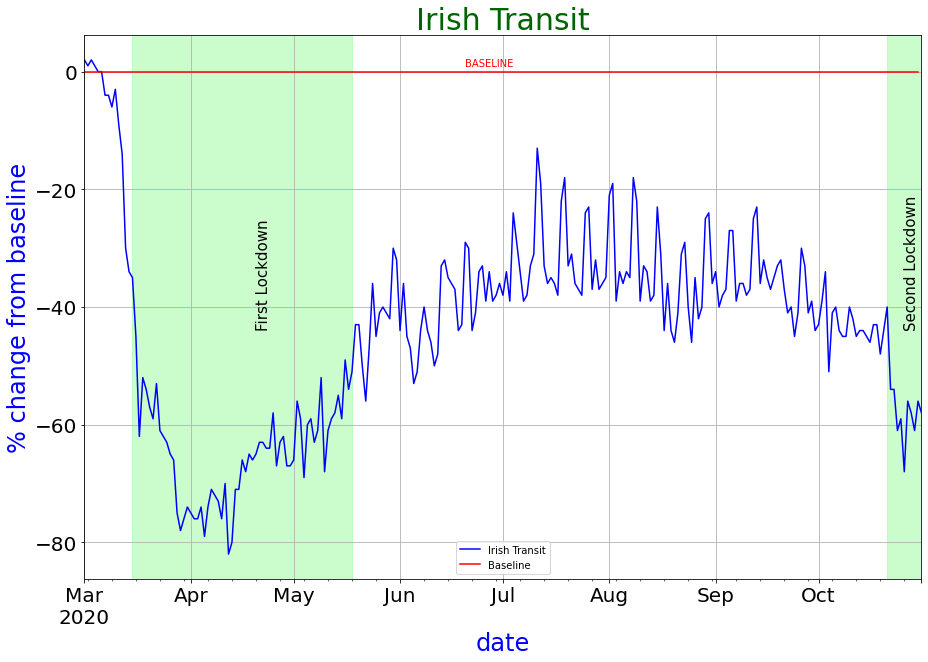

Irish Transit Mean: -43.4%


In [19]:
irish_transport_df=df_ireland["transit_stations_percent_change_from_baseline"]
irishLineGraph(irish_transport_df,"Irish Transit")
printAvg(irish_transport_df,"Irish Transit")

Its quite obvious that movement using public transport has greatly decreased. This clearly due to less people going to work and generally attending the less social events as well. The Irish Government recommended that irish people stay within 2km of their homes during the lockdowns for non-essential travel. Additionally interntaional air traffic has been greatly reduced to prevent the spread of the virus, decreasing the people who pass through airports.

# Irish Workplaces

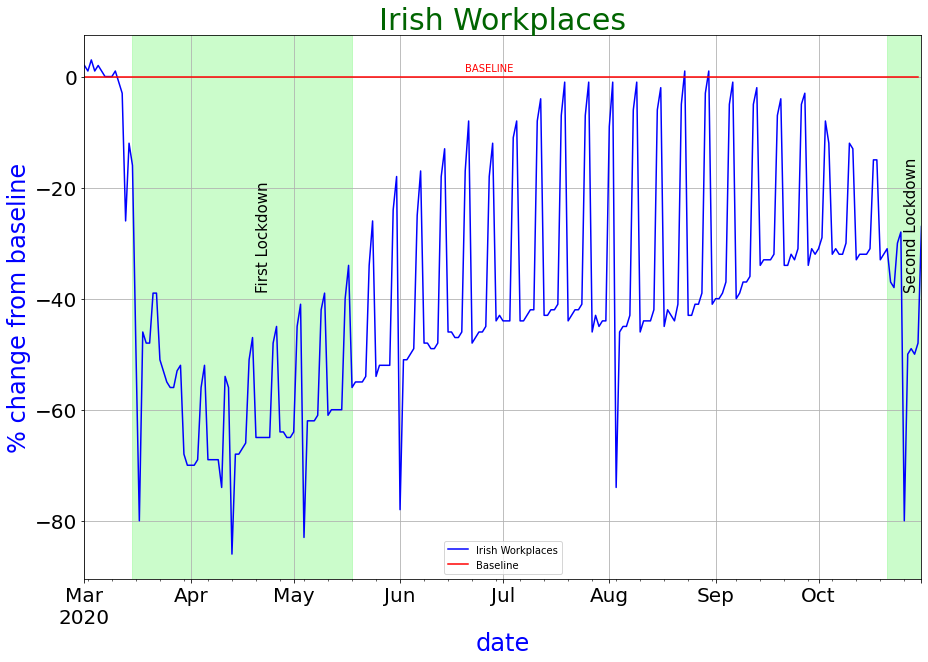

Irish Workplaces Mean: -38.31%


In [20]:
irish_workplaces_df=df_ireland["workplaces_percent_change_from_baseline"]
irishLineGraph(irish_workplaces_df,"Irish Workplaces")
printAvg(irish_workplaces_df, "Irish Workplaces")

Irish movement in workplaces has visibly decreased due to the closure of businesses and the adatation of businesses to operationg remotley. The pattern of regular dips can be attributed to weekends, where lots o businesses are closed and the the extreme individual decreases in May, June and August can be contributed to Bank Holidays and the one in April to Easter Sunday/ Monday. Again we can see the effects of the lockdowns on movement in workplaces.

# Irish Places of Residence

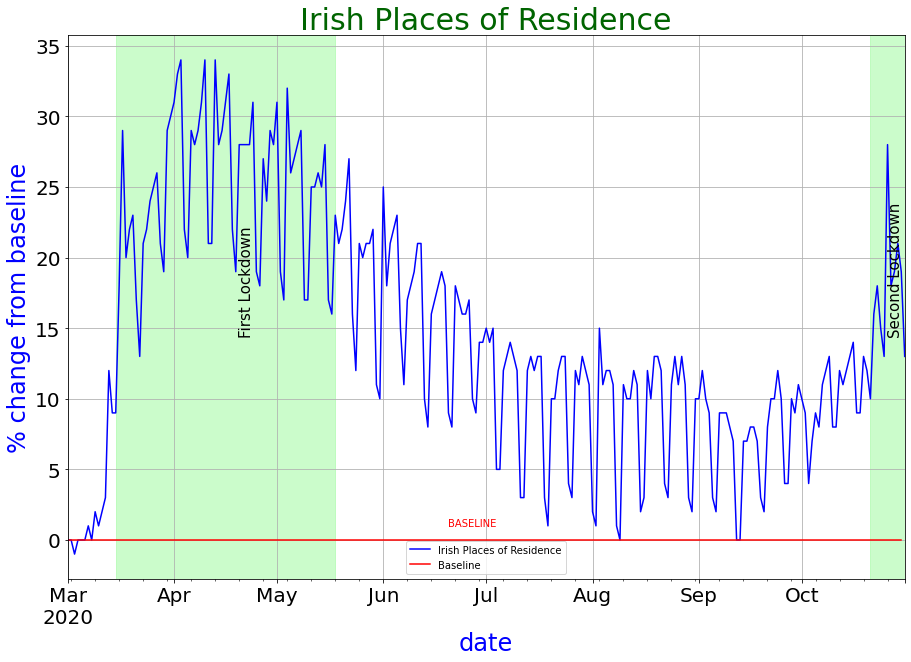

Irish Places of Residence Mean: 14.56%


In [21]:
irish_residential_df=df_ireland["residential_percent_change_from_baseline"]
irishLineGraph(irish_residential_df,"Irish Places of Residence")
printAvg(irish_residential_df,"Irish Places of Residence")

We again see a massive positive spike in the amount of time people spend at home, due to the First lockdown and closure of workplaces and places of recreational areas. The fact more people are working remotley, means that they will be spending the vast majority of their time at home. It is clear that people were also less likely to leave their homes during the Summer, when restrictions were lifted due to the pandemic.

# Essential V Non-Essential:

## Retail and Recreation compared to Supermarket and Pharmacy

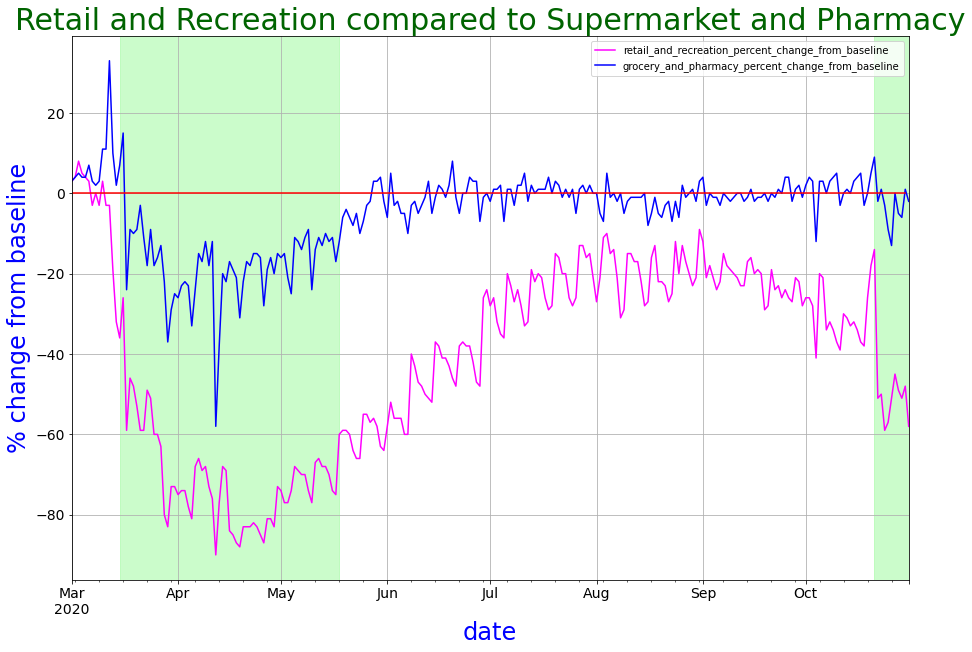

In [22]:
df_ret_rec=pd.concat([irish_retail_df,irish_grocery_df], axis=1)
irishComparitiveLineGraph(df_ret_rec,"Retail and Recreation compared to Supermarket and Pharmacy")

It is evident that the shape of the movement of people in retail almost mirrors that of supermarkets and pharmacies. This relationship tells us that people tend to visit retail stores and use recreational facilites when they are using supermarkets and pharmacies or visa versa. It is even more clear though, that people have returned to using essential services regularly, much quicker than the non-essential ones, as expected and desired by the government

In [23]:
df_ret_rec_month=aggByMonth(df_ret_rec)
print("Retail and Recreation compared to Supermarket and Pharmacy(Aggregated)")
df_ret_rec_month

Retail and Recreation compared to Supermarket and Pharmacy(Aggregated)


retail_and_recreation_percent_change_from_baseline  \
date                                                       
3                                               -1011.0    
4                                               -2354.0    
5                                               -2060.0    
6                                               -1361.0    
7                                                -738.0    
8                                                -603.0    
9                                                -646.0    
10                                              -1150.0    

      grocery_and_pharmacy_percent_change_from_baseline  
date                                                     
3                                                -129.0  
4                                                -652.0  
5                                                -301.0  
6                                                 -35.0  
7                                                  15.0  
8                                                 -63.0  
9                                                  -8.0  
10                                                 -2.0

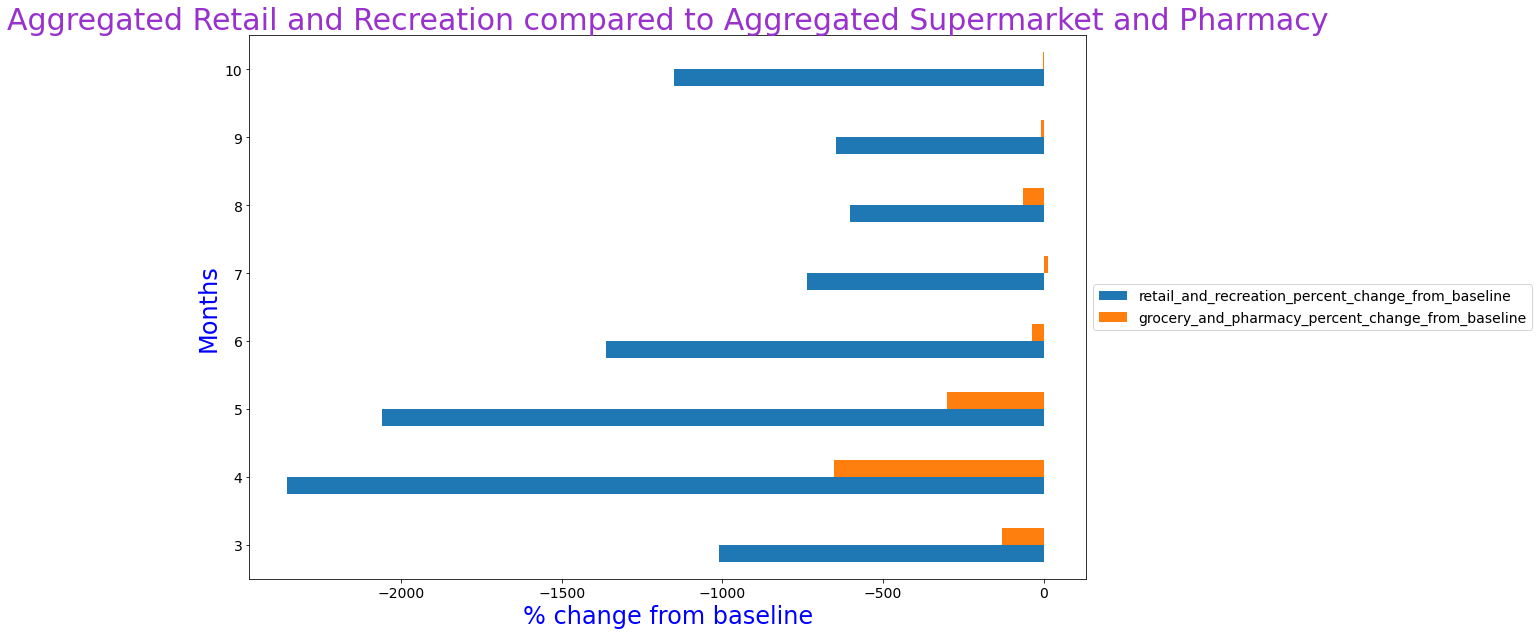

In [24]:
irishBarchart(df_ret_rec_month,"Aggregated Retail and Recreation compared to Aggregated Supermarket and Pharmacy")

It is clear that physical retail and recreation shops and services are suffering much more because of the pandemic than the supermarkets and pharmacies, lockdown and the decrease in both these areas have a very vivid correlation, where as lockdown meand a reduction in their use.

# The New Workplace:
## Workplace compared to Residential

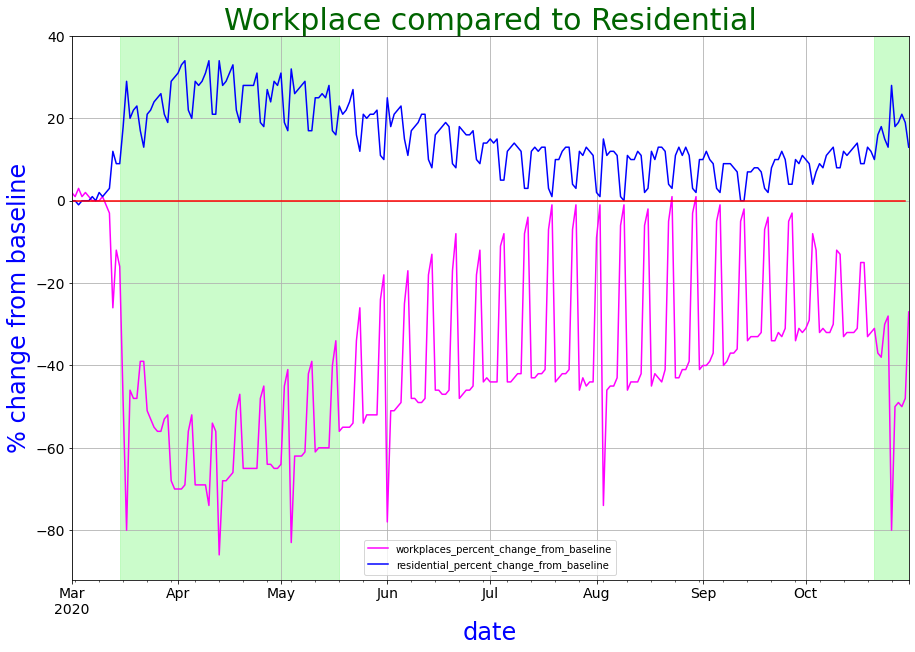

In [25]:
df_wor_res=pd.concat([irish_workplaces_df,irish_residential_df], axis=1)
irishComparitiveLineGraph(df_wor_res,"Workplace compared to Residential")

Lockdown is an ever present factor in the shape of the above graph. It is clear as people spend more time at home, they spend less at the workplace. Many people have begun working office jobs remotley, as well as third level students and many people who worked in closed businesses recieve unemployment benefit, meaning they too are more likely to be at home. Additionally, we can see as the first lockdown ended, people returning to work in the workplaces, which has a direct correlation with a decrease of people being at home, meaning these people are laving their houses to go to work. Lockdown number 2 also shows an identical trend to the beginning of lockdown 2 as workplaces close fo saftey.

In [26]:
df_wor_res_month=aggByMonth(df_wor_res)
print("Workplace compared to Residential (Aggregated)")
df_wor_res_month

Workplace compared to Residential (Aggregated)


workplaces_percent_change_from_baseline  \
date                                            
3                                      -910.0   
4                                     -1906.0   
5                                     -1575.0   
6                                     -1200.0   
7                                     -1039.0   
8                                      -967.0   
9                                      -803.0   
10                                     -985.0   

      residential_percent_change_from_baseline  
date                                            
3                                        397.0  
4                                        817.0  
5                                        676.0  
6                                        485.0  
7                                        315.0  
8                                        265.0  
9                                        218.0  
10                                       394.0

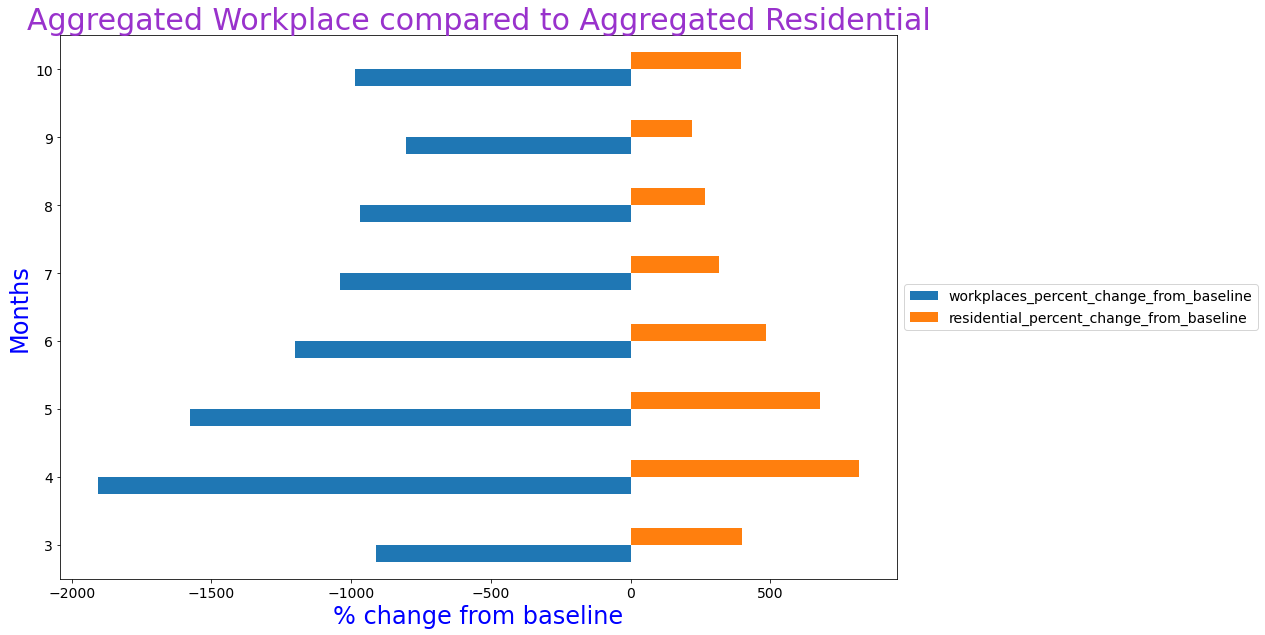

In [27]:
irishBarchart(df_wor_res_month,"Aggregated Workplace compared to Aggregated Residential")

An interesting thought I have derived from the above graph, is that the bars of each topic are in the same order. This helps concrete my point from earlier that when more people are at home, less people are at work.

# The New Commute
## Workplaces compared to Transit Stations

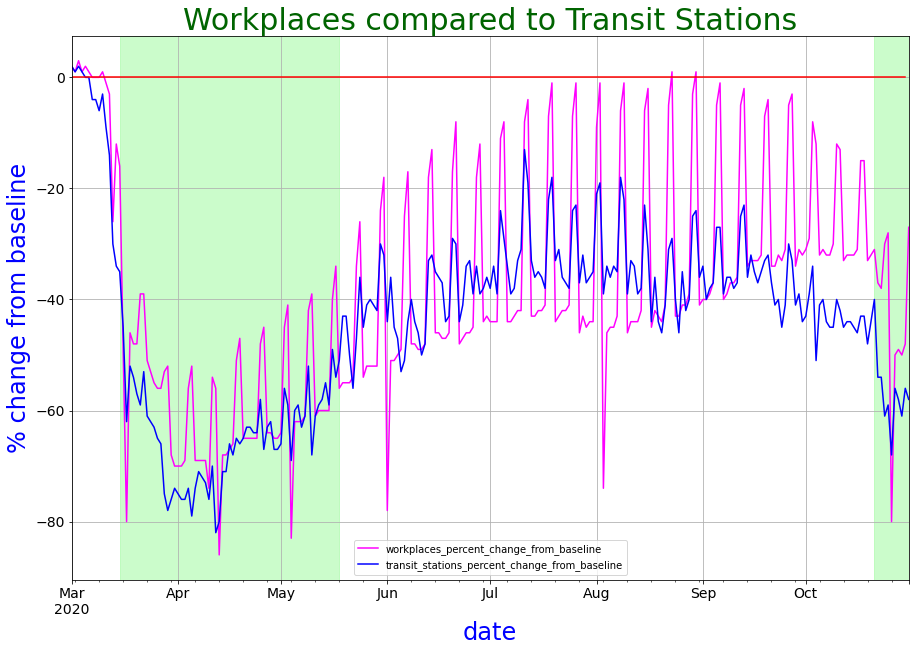

In [28]:
df_wor_tra=pd.concat([irish_workplaces_df,irish_transport_df], axis=1)
irishComparitiveLineGraph(df_wor_tra,"Workplaces compared to Transit Stations")

In [29]:
df_wor_tra_month=aggByMonth(df_wor_tra)
print("Workplace compared to Transit Stations (Aggregated)")
df_wor_tra_month

Workplace compared to Transit Stations (Aggregated)


workplaces_percent_change_from_baseline  \
date                                            
3                                      -910.0   
4                                     -1906.0   
5                                     -1575.0   
6                                     -1200.0   
7                                     -1039.0   
8                                      -967.0   
9                                      -803.0   
10                                     -985.0   

      transit_stations_percent_change_from_baseline  
date                                                 
3                                           -1135.0  
4                                           -2088.0  
5                                           -1605.0  
6                                           -1205.0  
7                                            -988.0  
8                                           -1054.0  
9                                           -1068.0  
10                                          -1491.0

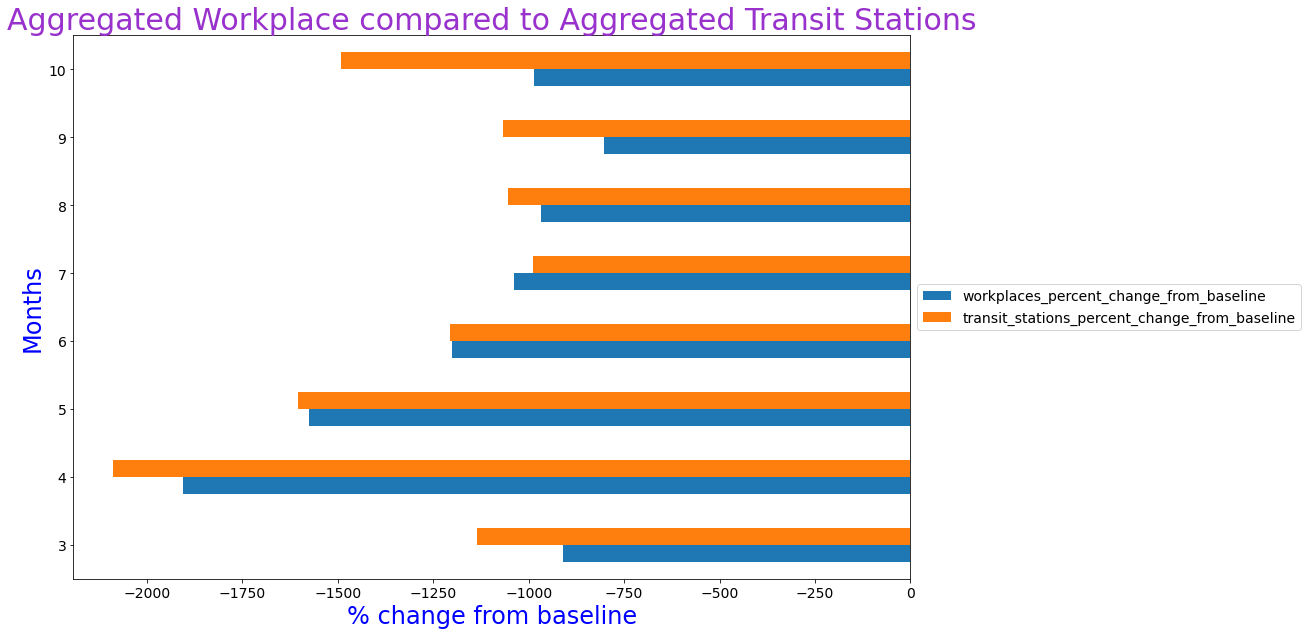

In [31]:
irishBarchart(df_wor_tra_month, "Aggregated Workplace compared to Aggregated Transit Stations")

There is a very clear pattern between the decline of public transport usage and the abscence of people in the physical workplace. Even when the workplaces began opening back up, it is clear that some users who may of regularly used public transport as a means of commuting may now be commuting using alternative methods of transport i.e. walking, cycling or driving to avoid catching the virus. Moreover, currently Irish buses (the most popular from of public transport in Ireland) are operating with only 50% capacity to enforce social- distancing and only 25% during th lockdowns, meaning less people can physically get on the buses

# The Parks

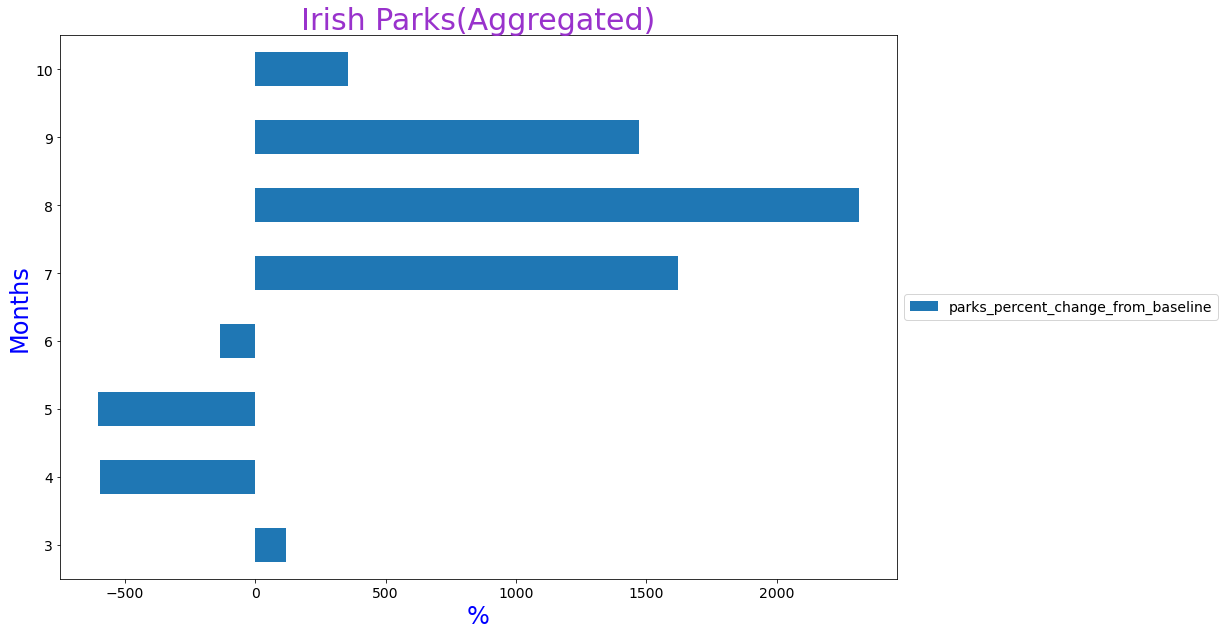

In [123]:
df_per_month=aggByMonth(irish_parks_df)
irishBarchart(df_per_month,"Irish Parks(Aggregated)")

The popularity of parks has greatly increased. This is is most obvious in the July to September period, as we had an easing of resrticitons, and the warmest and driest periods. Parks are also the only studied section by Google that is prominenlty an outside place, where there are no restrictions and much lower chances of spreading the disease. Many young people have also been using parks as sports fields, as gyms and sports fields have been operating at reduced capacity in general and closed completley during lockdown.

# Irish Conclusion

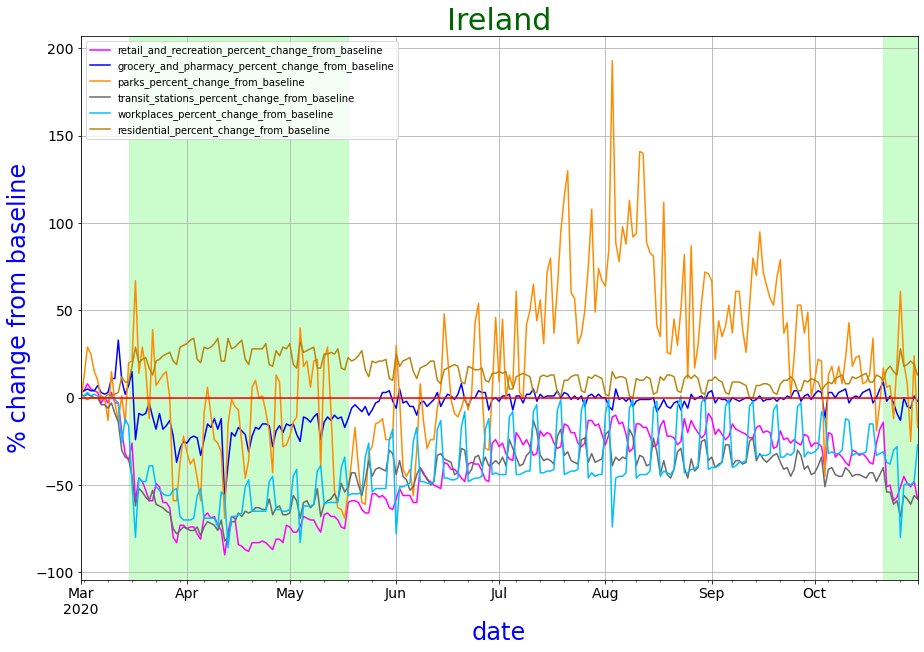

In [32]:
irishComparitiveLineGraph(df_ireland, "Ireland")

To conclude with Ireland, it is my opinion that people have tended to use outdoor and essential locations much more than unnessecary and higher- risk indoor ones. As expected, there is an increase in the amount of people at home, but a massive comparative proportionate jump in people using the parks, showing a potential shift in peoples interests in the pandemic to favour outdoor activity. Overall, it seems the Irish people have chose the parks over the shopping centres and cinemas.

# 1(b) Sweden

## Loading of Swedish Data
Loading the <b>Swedish CSV Dataset</b>  for cleaning and filtering.

In [33]:
df_sweden=pd.read_csv("sweden.csv", index_col="date", parse_dates=True)
df_sweden.head()

id country  \
date                          
2020-03-01  2063237  Sweden   
2020-03-02  2063238  Sweden   
2020-03-03  2063239  Sweden   
2020-03-04  2063240  Sweden   
2020-03-05  2063241  Sweden   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                               -1.0    
2020-03-02                                                1.0    
2020-03-03                                                0.0    
2020-03-04                                               -2.0    
2020-03-05                                                0.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                               -2.0   
2020-03-02                                                2.0   
2020-03-03                                                2.0   
2020-03-04                                               -1.0   
2020-03-05                                                3.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -7.0   
2020-03-02                                10.0   
2020-03-03                                 5.0   
2020-03-04                                -2.0   
2020-03-05                                 8.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                           -6.0   
2020-03-02                                           -3.0   
2020-03-03                                           -4.0   
2020-03-04                                           -5.0   
2020-03-05                                           -4.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                     -2.0   
2020-03-02                                     -2.0   
2020-03-03                                     -2.0   
2020-03-04                                     -2.0   
2020-03-05                                     -2.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       1.0  
2020-03-02                                       1.0  
2020-03-03                                       1.0  
2020-03-04                                       1.0  
2020-03-05                                       1.0

In [34]:
df_sweden.tail()

id country  \
date                          
2020-10-27  2063477  Sweden   
2020-10-28  2063478  Sweden   
2020-10-29  2063479  Sweden   
2020-10-30  2063480  Sweden   
2020-10-31  2063481  Sweden   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-10-27                                                1.0    
2020-10-28                                               -2.0    
2020-10-29                                               -1.0    
2020-10-30                                               -9.0    
2020-10-31                                              -21.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-10-27                                                3.0   
2020-10-28                                                1.0   
2020-10-29                                                4.0   
2020-10-30                                               -2.0   
2020-10-31                                               -6.0   

            parks_percent_change_from_baseline  \
date                                             
2020-10-27                                44.0   
2020-10-28                                35.0   
2020-10-29                                44.0   
2020-10-30                                39.0   
2020-10-31                                49.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-10-27                                          -31.0   
2020-10-28                                          -34.0   
2020-10-29                                          -34.0   
2020-10-30                                          -36.0   
2020-10-31                                          -23.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-10-27                                    -31.0   
2020-10-28                                    -31.0   
2020-10-29                                    -35.0   
2020-10-30                                    -40.0   
2020-10-31                                     -8.0   

            residential_percent_change_from_baseline  
date                                                  
2020-10-27                                       7.0  
2020-10-28                                       7.0  
2020-10-29                                       7.0  
2020-10-30                                       9.0  
2020-10-31                                       2.0

In [127]:
removeId(df_sweden)

In [142]:
# Swedish fucntions
def swedishLineGraph(dataFrame, heading):
    ax=dataFrame.plot(figsize=(15,10),fontsize=20,color="dodgerblue")
    ax.set_title(heading,fontsize=30, color="gold")
    ax.text("2020-06-20",1,"BASELINE",color="r")
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('% change from baseline', fontsize=24,color="blue")
    fig=baseline_df.plot(ax=ax, color="r")
    plt.grid()
    plt.show()

In [143]:
def swedishComparitiveLineGraph(df, heading):
    ax = df.plot(figsize=(15, 10), fontsize=14, color=["magenta", "blue","darkorange","dimgray","deepskyblue","darkgoldenrod","aqua"])
    ax.set_title(heading,fontsize=30, color="gold")
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('% change from baseline', fontsize=24,color="blue")
    fig=baseline_df.plot(ax=ax, color="r")
    plt.grid()
    plt.show()

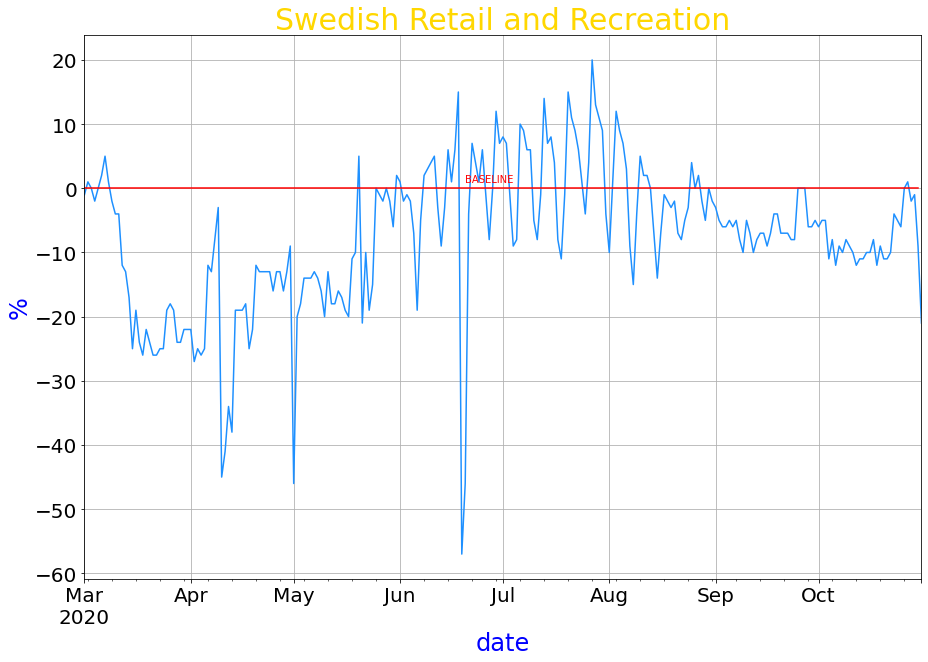

Swedish Retail and Recreation Mean: -7.67%


In [144]:
swedish_retail_df=df_sweden["retail_and_recreation_percent_change_from_baseline"]
swedishLineGraph(swedish_retail_df,"Swedish Retail and Recreation" )
printAvg(swedish_retail_df,"Swedish Retail and Recreation")

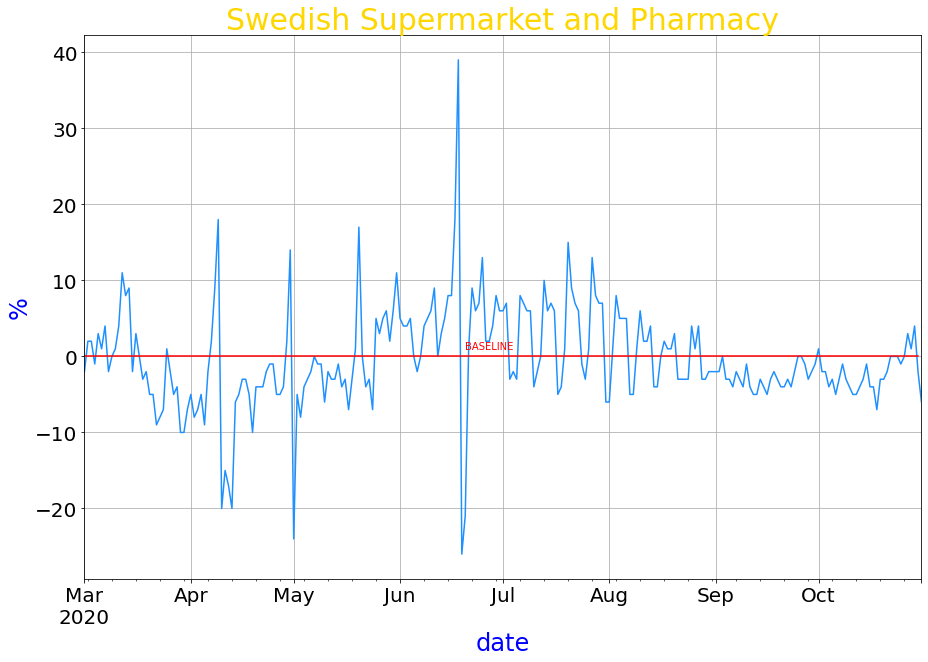

Swedish Supermarket and Pharmacy Mean: -0.4%


In [145]:
swedish_grocery_df=df_sweden["grocery_and_pharmacy_percent_change_from_baseline"]
swedishLineGraph(swedish_grocery_df,"Swedish Supermarket and Pharmacy")
printAvg(swedish_grocery_df,"Swedish Supermarket and Pharmacy")

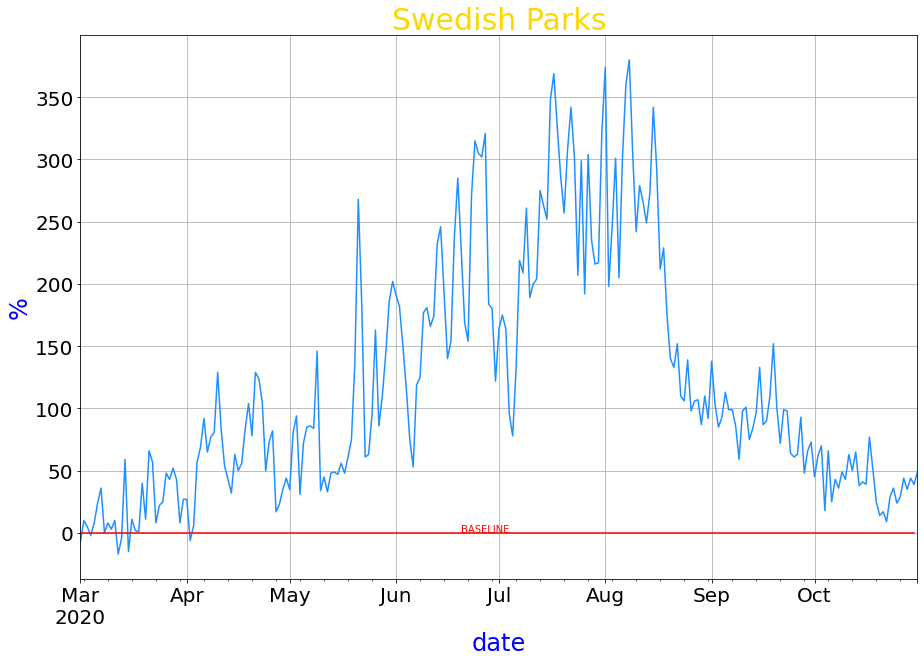

Swedish Parks Mean: 119.17%


In [146]:
swedish_parks_df=df_sweden["parks_percent_change_from_baseline"]
swedishLineGraph(swedish_parks_df,"Swedish Parks")
printAvg(swedish_parks_df,"Swedish Parks")

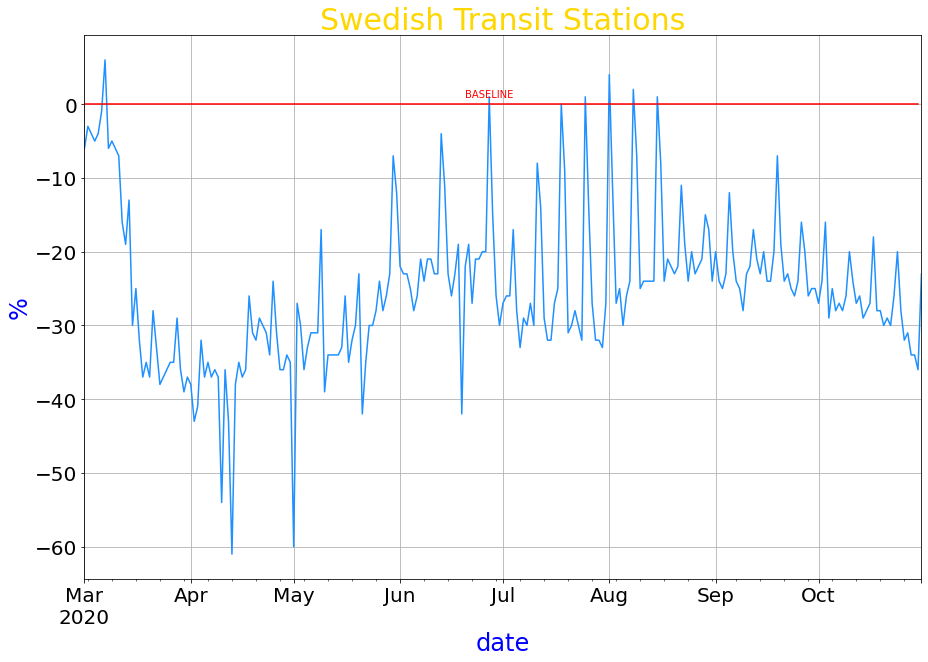

Swedish Transit Stations Mean: -25.2%


In [147]:
swedish_transport_df=df_sweden["transit_stations_percent_change_from_baseline"]
swedishLineGraph(swedish_transport_df,"Swedish Transit Stations")
printAvg(swedish_transport_df,"Swedish Transit Stations")

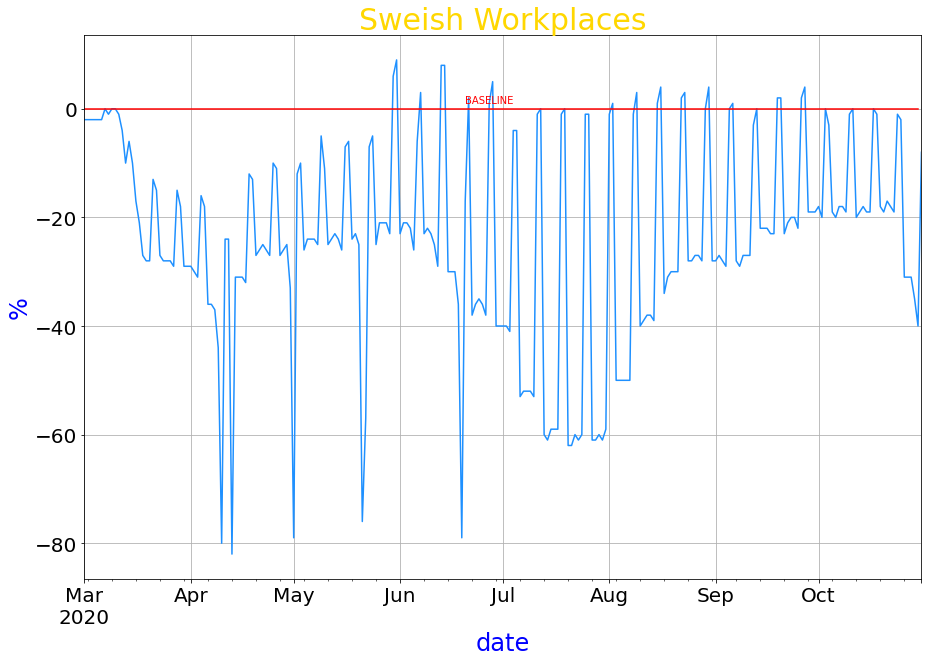

Swedish Workplaces Mean: -23.59%


In [148]:
swedish_workplaces_df=df_sweden["workplaces_percent_change_from_baseline"]
swedishLineGraph(swedish_workplaces_df,"Sweish Workplaces")
printAvg(swedish_workplaces_df, "Swedish Workplaces")

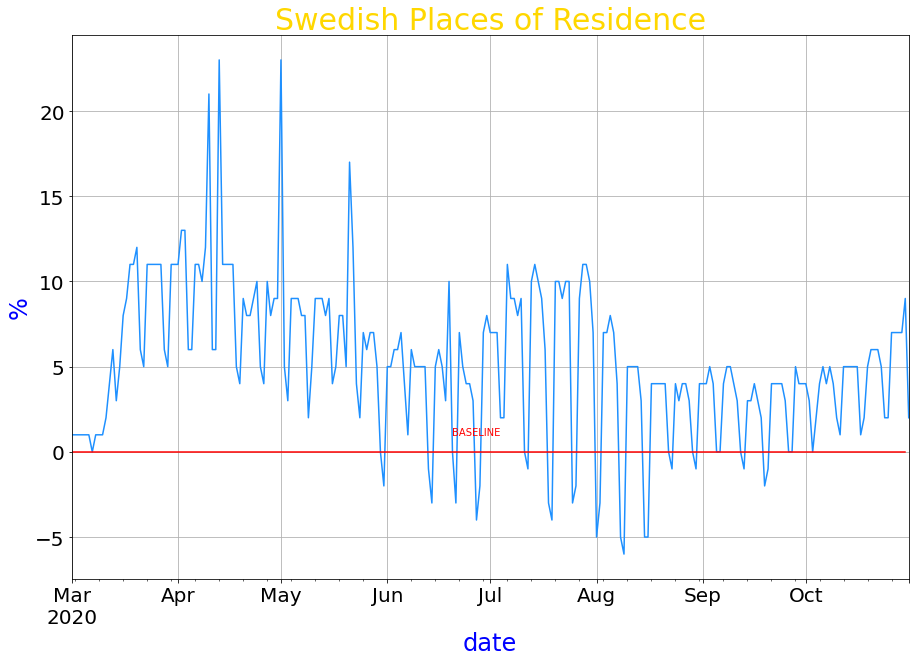

Swedish Places of Residence Mean: 5.25%


In [149]:
swedish_residential_df=df_sweden["residential_percent_change_from_baseline"]
swedishLineGraph(swedish_residential_df,"Swedish Places of Residence")
printAvg(swedish_residential_df,"Swedish Places of Residence")

In [150]:
# Retail and Recreation compared to Supermarket and Pharmacy

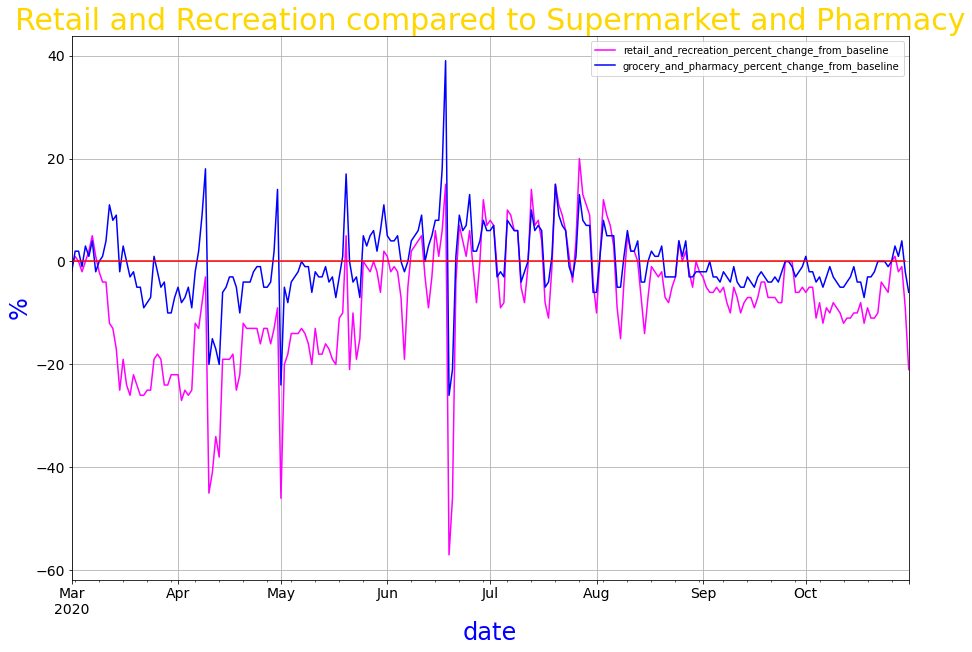

In [151]:
df_swe_ret_rec=pd.concat([swedish_retail_df,swedish_grocery_df], axis=1)
swedishComparitiveLineGraph(df_swe_ret_rec,"Retail and Recreation compared to Supermarket and Pharmacy")

In [152]:
df_swe_ret_rec_month=aggByMonth(df_swe_ret_rec)
print("Retail and Recreation compared to Supermarket and Pharmacy(Aggregated)")
df_swe_ret_rec_month

Retail and Recreation compared to Supermarket and Pharmacy(Aggregated)


retail_and_recreation_percent_change_from_baseline  \
date                                                       
3                                                -436.0    
4                                                -585.0    
5                                                -400.0    
6                                                 -87.0    
7                                                 118.0    
8                                                 -59.0    
9                                                -176.0    
10                                               -255.0    

      grocery_and_pharmacy_percent_change_from_baseline  
date                                                     
3                                                 -35.0  
4                                                -125.0  
5                                                 -38.0  
6                                                 132.0  
7                                                 110.0  
8                                                   9.0  
9                                                 -82.0  
10                                                -68.0

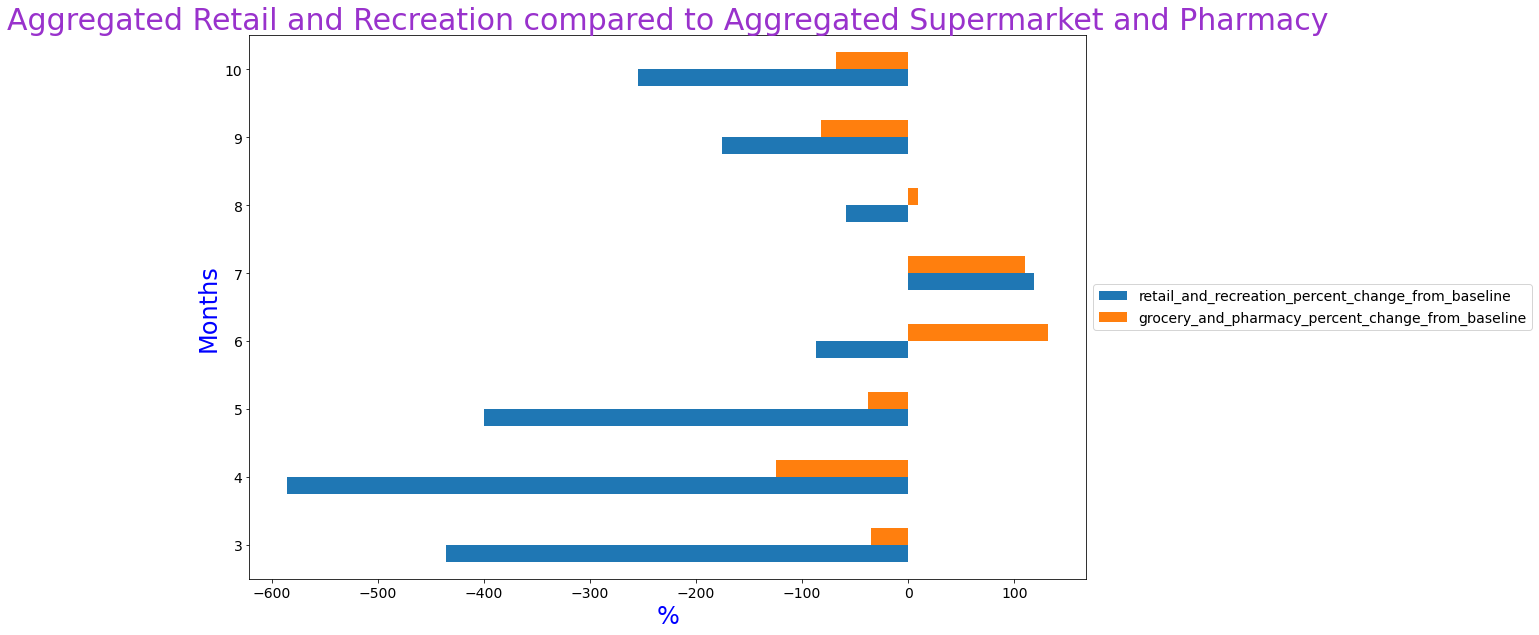

In [153]:
irishBarchart(df_swe_ret_rec_month,"Aggregated Retail and Recreation compared to Aggregated Supermarket and Pharmacy")

# Workplace compared to Residential

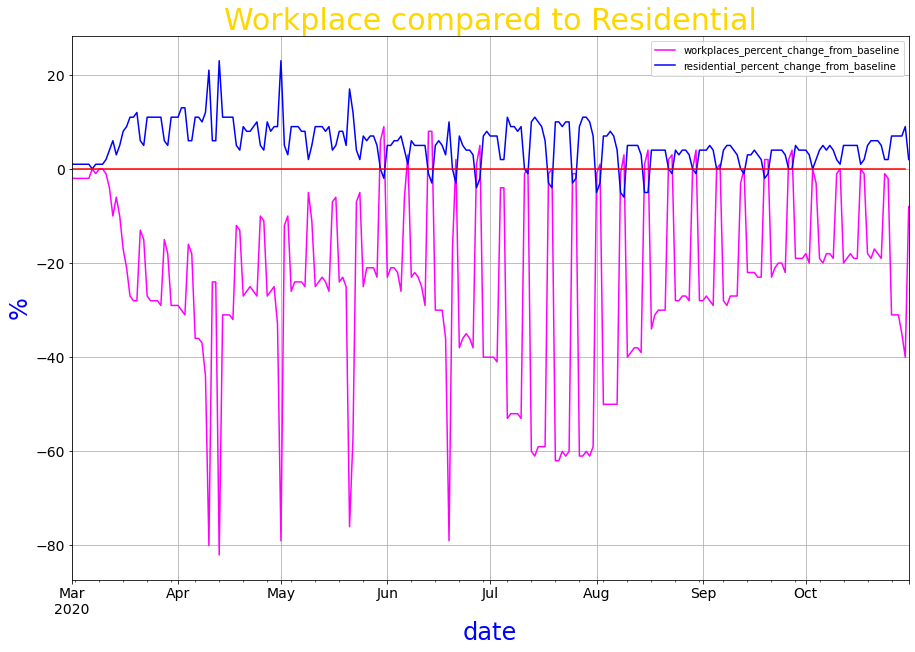

In [154]:
df_swe_wor_res=pd.concat([swedish_workplaces_df,swedish_residential_df], axis=1)
swedishComparitiveLineGraph(df_swe_wor_res,"Workplace compared to Residential")

In [155]:
df_swe_wor_res_month=aggByMonth(df_swe_wor_res)
print("Workplace compared to Residential (Aggregated)")
df_swe_wor_res_month

Workplace compared to Residential (Aggregated)


workplaces_percent_change_from_baseline  \
date                                            
3                                      -424.0   
4                                      -900.0   
5                                      -688.0   
6                                      -699.0   
7                                     -1300.0   
8                                      -749.0   
9                                      -517.0   
10                                     -502.0   

      residential_percent_change_from_baseline  
date                                            
3                                        179.0  
4                                        291.0  
5                                        220.0  
6                                        114.0  
7                                        201.0  
8                                         67.0  
9                                         81.0  
10                                       133.0

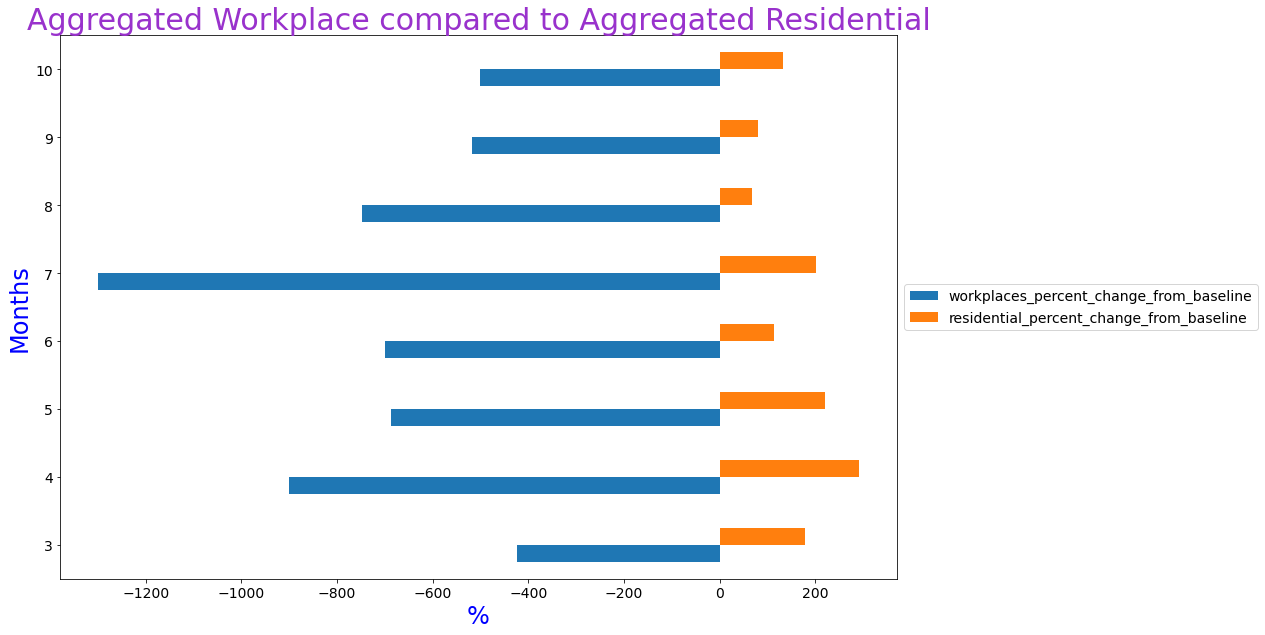

In [156]:
irishBarchart(df_swe_wor_res_month,"Aggregated Workplace compared to Aggregated Residential")

# Workplace compared to Transit Stations

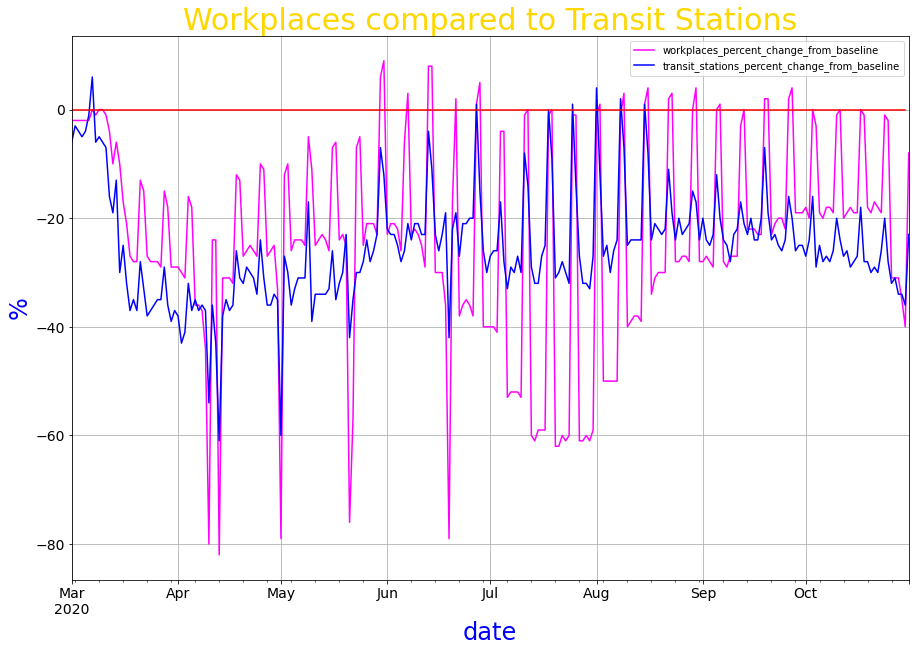

In [157]:
df_swe_wor_tra=pd.concat([swedish_workplaces_df,swedish_transport_df], axis=1)
swedishComparitiveLineGraph(df_swe_wor_tra,"Workplaces compared to Transit Stations")

In [158]:
df_swe_wor_tra_month=aggByMonth(df_swe_wor_tra)
print("Workplace compared to Transit Stations (Aggregated)")
df_swe_wor_tra_month

Workplace compared to Transit Stations (Aggregated)


workplaces_percent_change_from_baseline  \
date                                            
3                                      -424.0   
4                                      -900.0   
5                                      -688.0   
6                                      -699.0   
7                                     -1300.0   
8                                      -749.0   
9                                      -517.0   
10                                     -502.0   

      transit_stations_percent_change_from_baseline  
date                                                 
3                                            -668.0  
4                                           -1085.0  
5                                            -935.0  
6                                            -648.0  
7                                            -764.0  
8                                            -581.0  
9                                            -655.0  
10                                           -838.0

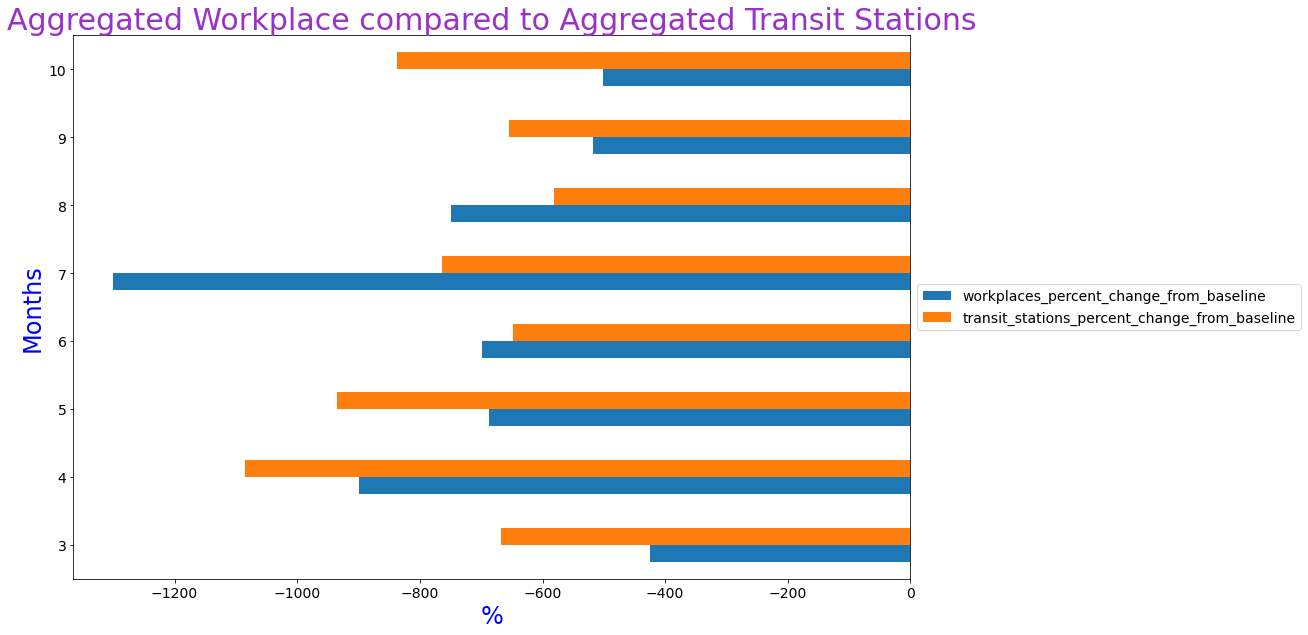

In [159]:
irishBarchart(df_swe_wor_tra_month, "Aggregated Workplace compared to Aggregated Transit Stations")

# The Parks

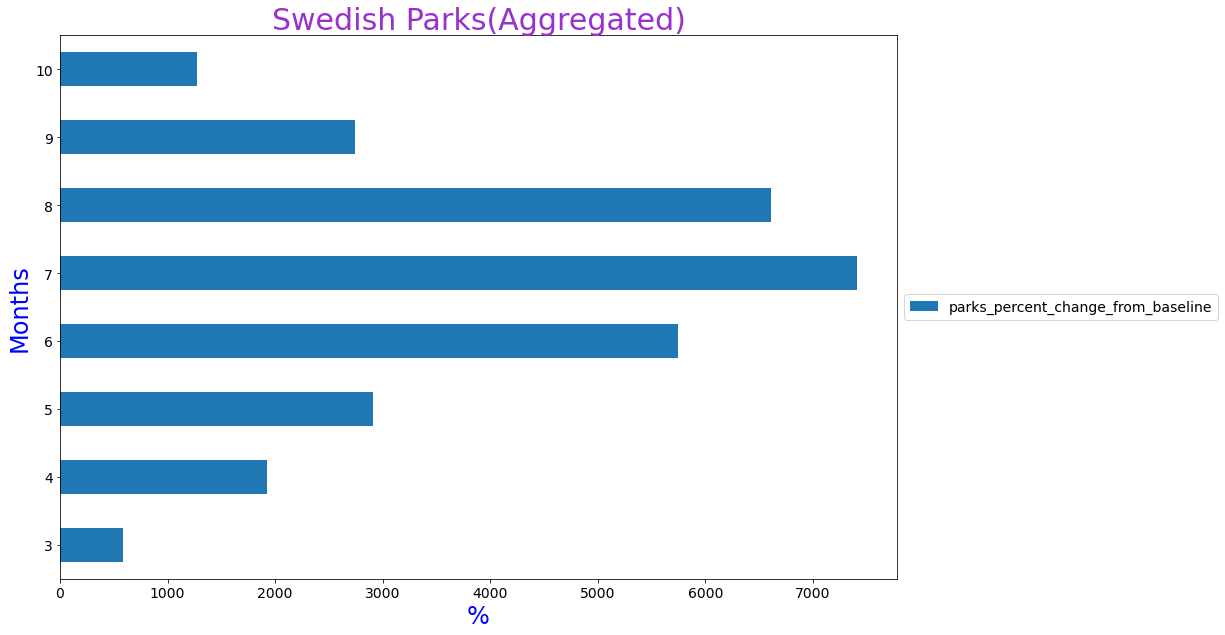

In [160]:
df_swe_per_month=aggByMonth(swedish_parks_df)
irishBarchart(df_swe_per_month,"Swedish Parks(Aggregated)")

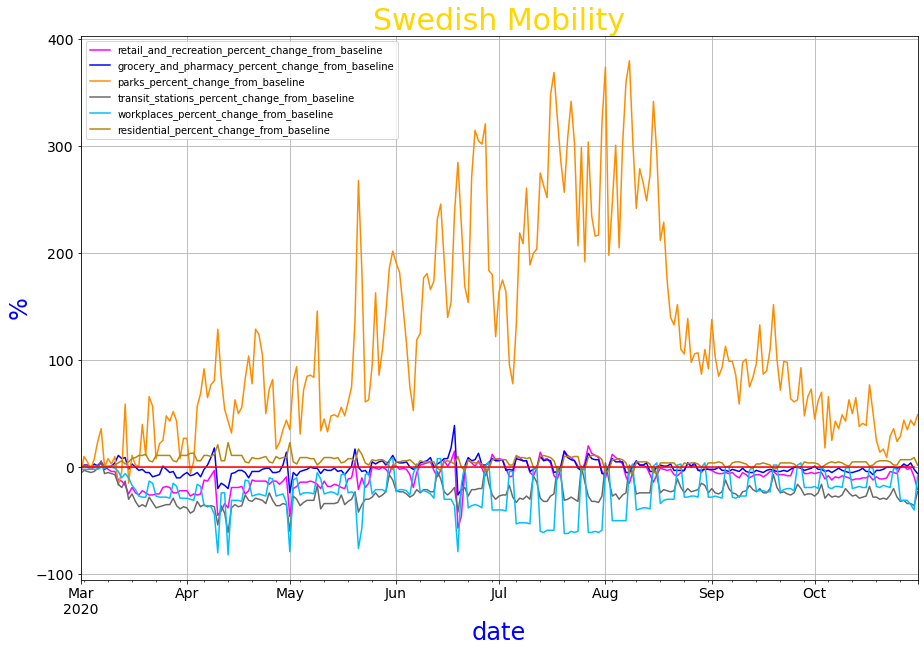

In [161]:
swedishComparitiveLineGraph(df_sweden,"Swedish Mobility")

# 1(c) New Zealand

## Loading of New Zealand's Data
Loading the <b>New Zealand CSV Dataset</b>  for cleaning and filtering.

In [162]:
df_new_zealand=pd.read_csv("new_zealand.csv", index_col="date", parse_dates=True)
df_new_zealand.head()

id      country  \
date                               
2020-03-01  1767703  New Zealand   
2020-03-02  1767704  New Zealand   
2020-03-03  1767705  New Zealand   
2020-03-04  1767706  New Zealand   
2020-03-05  1767707  New Zealand   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-03-01                                                1.0    
2020-03-02                                               -4.0    
2020-03-03                                               -4.0    
2020-03-04                                               -2.0    
2020-03-05                                                0.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-03-01                                                4.0   
2020-03-02                                               -1.0   
2020-03-03                                                0.0   
2020-03-04                                                0.0   
2020-03-05                                                1.0   

            parks_percent_change_from_baseline  \
date                                             
2020-03-01                                -1.0   
2020-03-02                               -10.0   
2020-03-03                                -6.0   
2020-03-04                               -17.0   
2020-03-05                               -15.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-03-01                                            8.0   
2020-03-02                                           16.0   
2020-03-03                                            8.0   
2020-03-04                                            9.0   
2020-03-05                                           10.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-03-01                                      1.0   
2020-03-02                                     34.0   
2020-03-03                                     17.0   
2020-03-04                                     16.0   
2020-03-05                                     20.0   

            residential_percent_change_from_baseline  
date                                                  
2020-03-01                                       1.0  
2020-03-02                                      -2.0  
2020-03-03                                      -1.0  
2020-03-04                                      -1.0  
2020-03-05                                      -1.0

In [163]:
df_new_zealand.tail()

id      country  \
date                               
2020-10-27  1767943  New Zealand   
2020-10-28  1767944  New Zealand   
2020-10-29  1767945  New Zealand   
2020-10-30  1767946  New Zealand   
2020-10-31  1767947  New Zealand   

            retail_and_recreation_percent_change_from_baseline  \
date                                                             
2020-10-27                                               -6.0    
2020-10-28                                               -2.0    
2020-10-29                                               -2.0    
2020-10-30                                                2.0    
2020-10-31                                                7.0    

            grocery_and_pharmacy_percent_change_from_baseline  \
date                                                            
2020-10-27                                               -3.0   
2020-10-28                                               -4.0   
2020-10-29                                               -4.0   
2020-10-30                                               -3.0   
2020-10-31                                                0.0   

            parks_percent_change_from_baseline  \
date                                             
2020-10-27                                -9.0   
2020-10-28                                -7.0   
2020-10-29                               -16.0   
2020-10-30                               -16.0   
2020-10-31                               -16.0   

            transit_stations_percent_change_from_baseline  \
date                                                        
2020-10-27                                          -28.0   
2020-10-28                                          -26.0   
2020-10-29                                          -26.0   
2020-10-30                                          -26.0   
2020-10-31                                          -26.0   

            workplaces_percent_change_from_baseline  \
date                                                  
2020-10-27                                      0.0   
2020-10-28                                      4.0   
2020-10-29                                      8.0   
2020-10-30                                      7.0   
2020-10-31                                      2.0   

            residential_percent_change_from_baseline  
date                                                  
2020-10-27                                       3.0  
2020-10-28                                       2.0  
2020-10-29                                       2.0  
2020-10-30                                       2.0  
2020-10-31                                       2.0

In [164]:
removeId(df_new_zealand)

In [165]:
#New Zealander lockdown
nz_lockdown=["2020-03-23","2020-06-03"]

In [169]:
#New Zealander functions
def nzLineGraph(dataFrame, heading):
    ax=dataFrame.plot(figsize=(15,10),fontsize=20,color="k")
    ax.set_title(heading,fontsize=30, color="k")
    ax.text("2020-04-20",dataFrame.mean(),"New Zealand Lockdown",rotation=90,fontsize=15)
    ax.text("2020-06-20",1,"BASELINE",color="r")
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('%', fontsize=24,color="blue")
    fig=baseline_df.plot(ax=ax, color="r")
    fig.legend([heading,"Baseline"])
    plt.axvspan(nz_lockdown[0],nz_lockdown[1] , color="slategrey", alpha=0.5)
    plt.grid()
    plt.show()

In [170]:
def nzComparitiveLineGraph(df, heading):
    ax = df.plot(figsize=(15, 10), fontsize=14, color=["magenta", "blue","darkorange","dimgray","deepskyblue","darkgoldenrod","aqua"])
    ax.set_title(heading,fontsize=30, color="k")
    ax.set_xlabel('', fontsize=24,color="blue")
    ax.set_ylabel('%', fontsize=24,color="blue")
    fig=baseline_df.plot(ax=ax, color="r")
    plt.axvspan(nz_lockdown[0],nz_lockdown[1] , color="slategrey", alpha=0.5)
    plt.grid()
    plt.show()

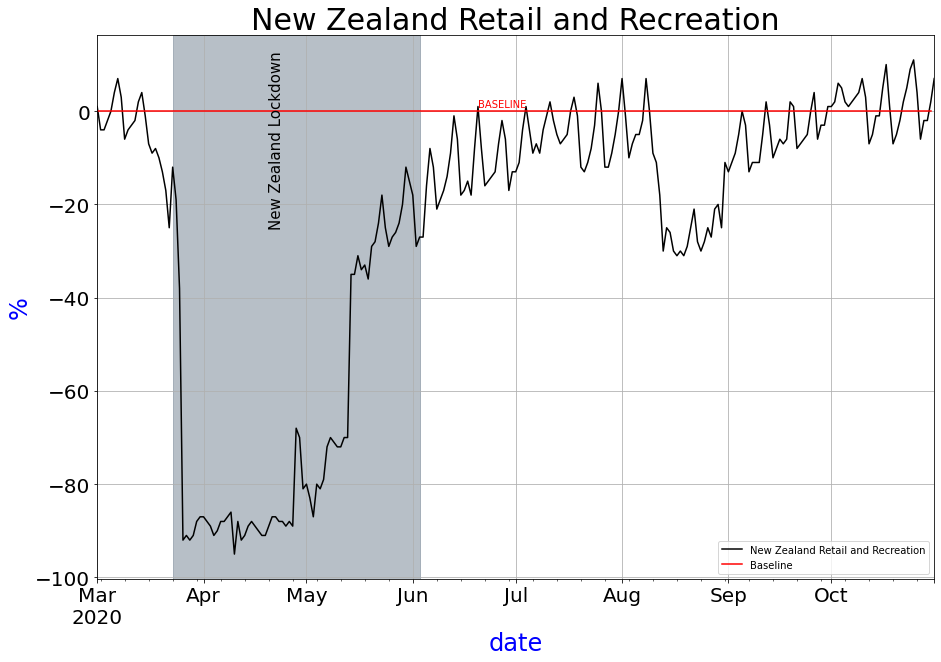

New Zealand Retail and Recreation Mean: -24.56%


In [171]:
nz_retail_df=df_new_zealand["retail_and_recreation_percent_change_from_baseline"]
nzLineGraph(nz_retail_df,"New Zealand Retail and Recreation" )
printAvg(nz_retail_df,"New Zealand Retail and Recreation")

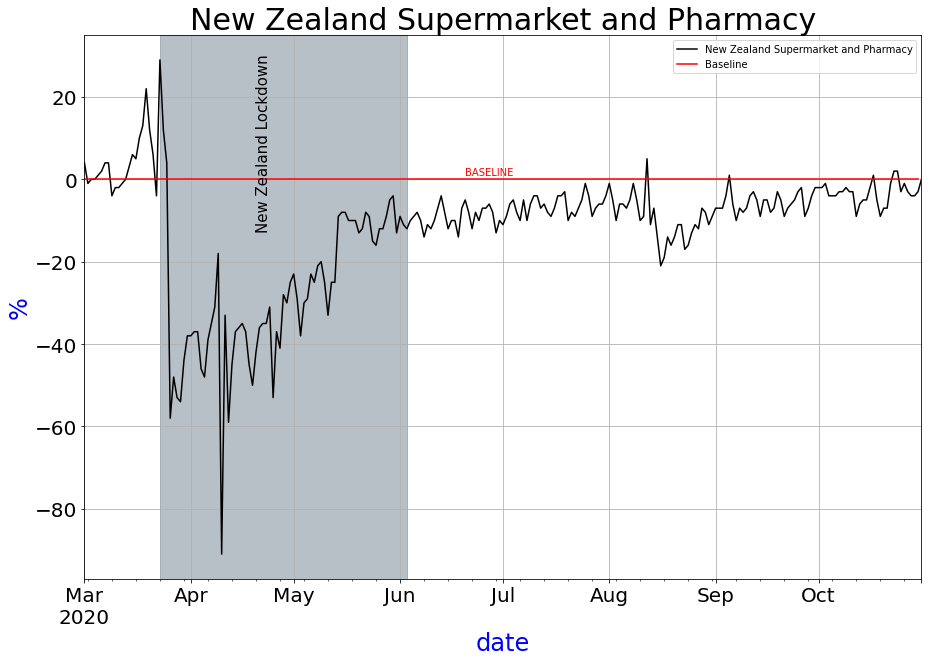

New Zealand Supermarket and Pharmacy Mean: -12.03%


In [172]:
nz_grocery_df=df_new_zealand["grocery_and_pharmacy_percent_change_from_baseline"]
nzLineGraph(nz_grocery_df,"New Zealand Supermarket and Pharmacy")
printAvg(nz_grocery_df,"New Zealand Supermarket and Pharmacy")

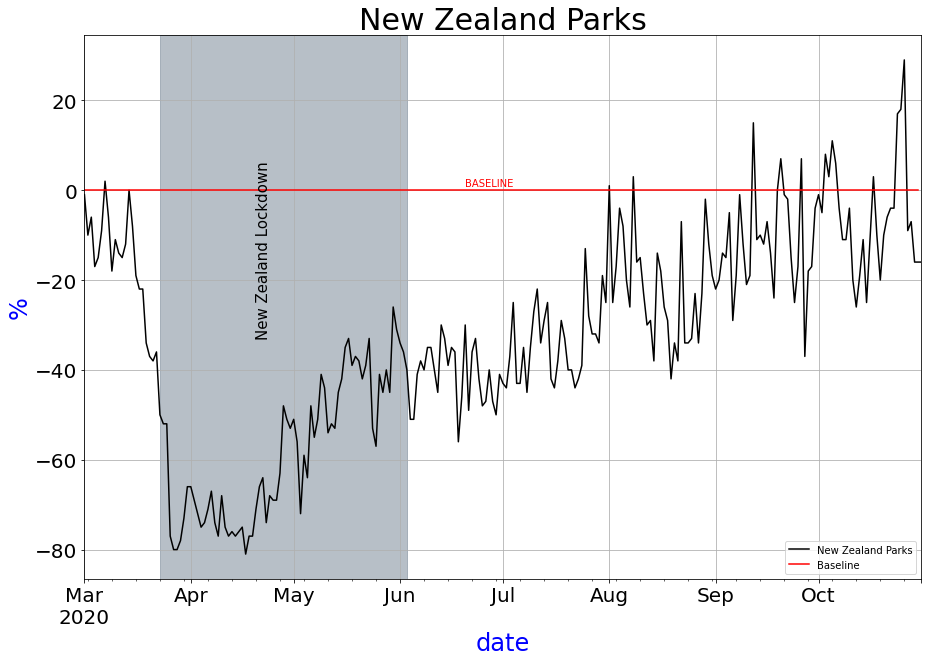

New Zealand Parks Mean: -32.51%


In [173]:
nz_parks_df=df_new_zealand["parks_percent_change_from_baseline"]
nzLineGraph(nz_parks_df,"New Zealand Parks")
printAvg(nz_parks_df,"New Zealand Parks")

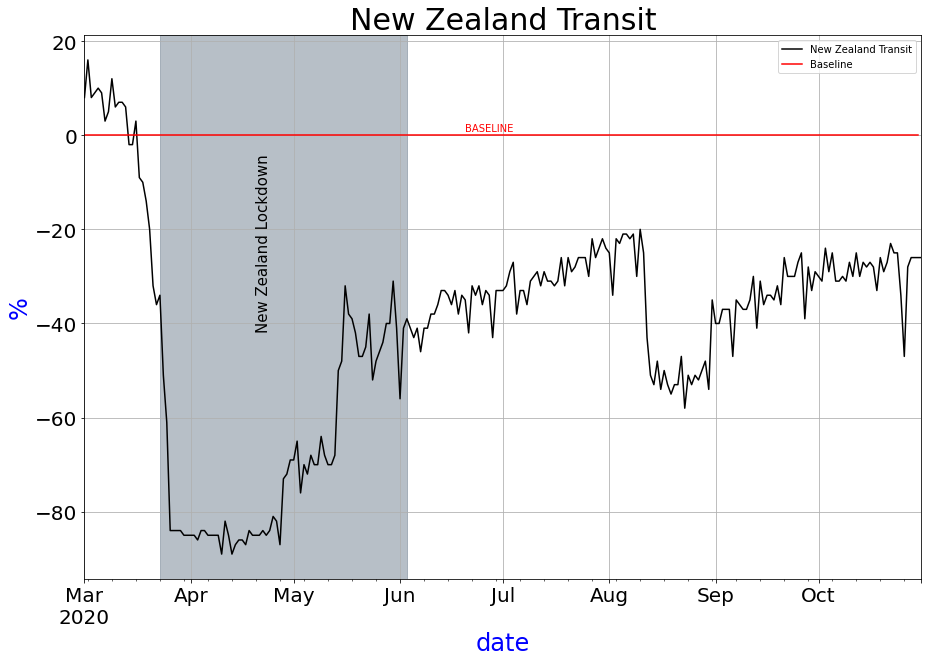

New Zealand Transit Mean: -41.08%


In [174]:
nz_transport_df=df_new_zealand["transit_stations_percent_change_from_baseline"]
nzLineGraph(nz_transport_df,"New Zealand Transit")
printAvg(nz_transport_df,"New Zealand Transit")

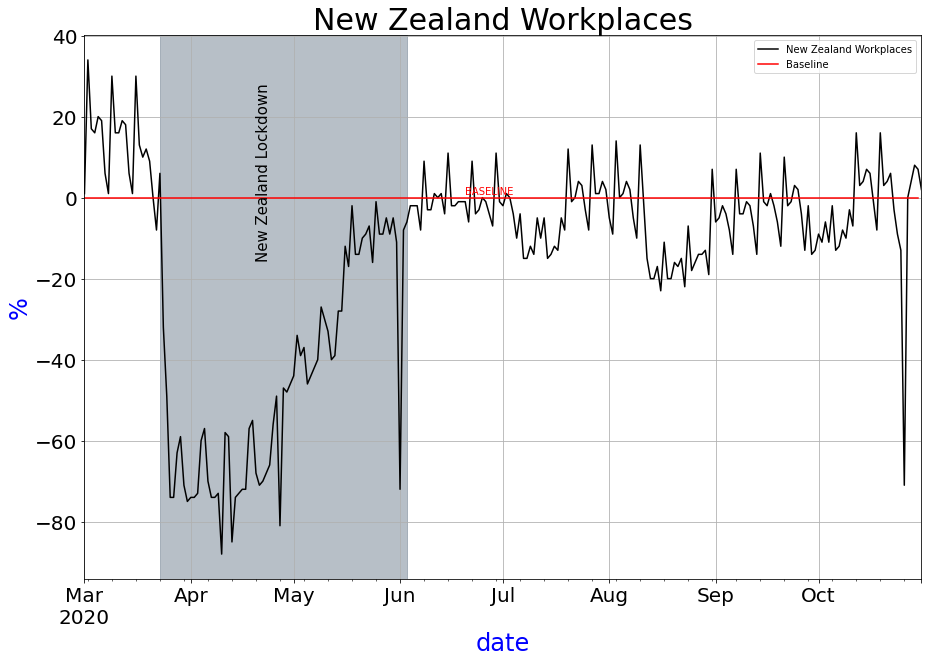

New Zealand Workplaces Mean: -14.93%


In [175]:
nz_workplaces_df=df_new_zealand["workplaces_percent_change_from_baseline"]
nzLineGraph(nz_workplaces_df,"New Zealand Workplaces")
printAvg(nz_workplaces_df, "New Zealand Workplaces")

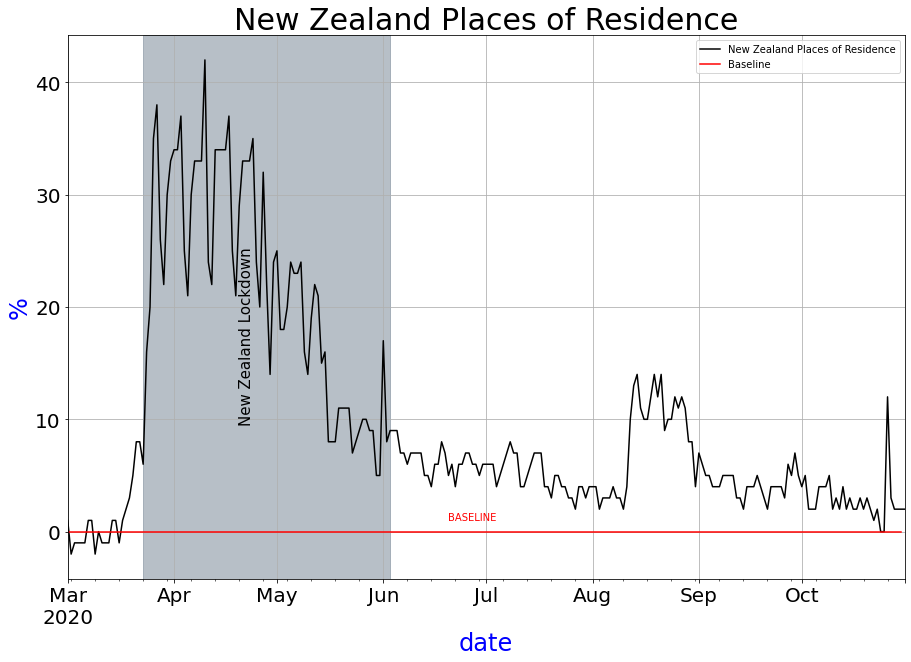

New Zealand Places of Residence Mean: 9.79%


In [176]:
nz_residential_df=df_new_zealand["residential_percent_change_from_baseline"]
nzLineGraph(nz_residential_df,"New Zealand Places of Residence")
printAvg(nz_residential_df,"New Zealand Places of Residence")

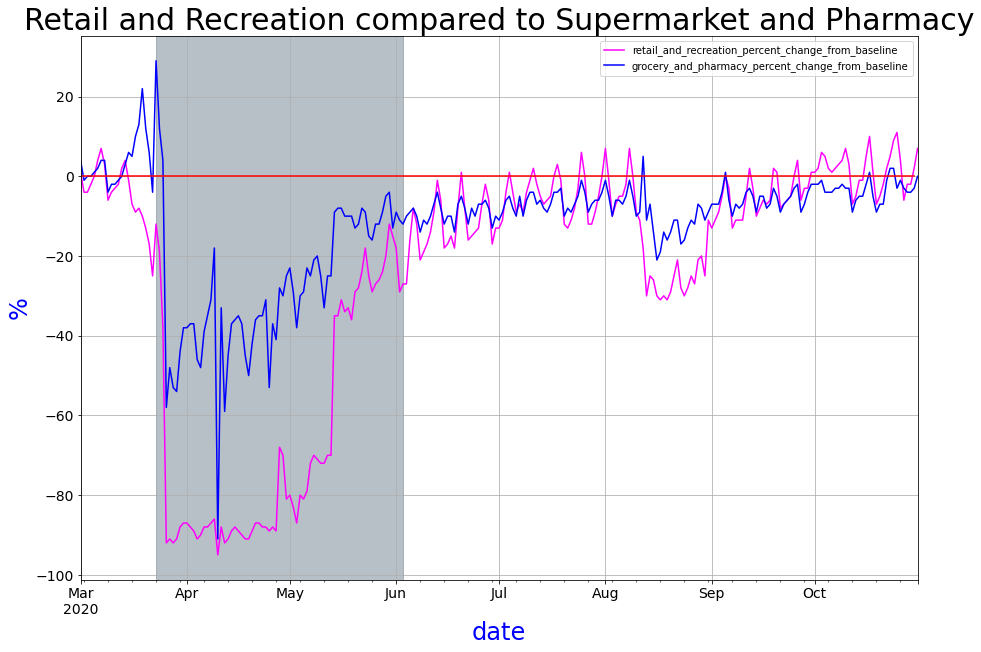

In [177]:
df_nz_ret_rec=pd.concat([nz_retail_df,nz_grocery_df], axis=1)
nzComparitiveLineGraph(df_nz_ret_rec,"Retail and Recreation compared to Supermarket and Pharmacy")

In [178]:
df_nz_ret_rec_month=aggByMonth(df_nz_ret_rec)
print("Retail and Recreation compared to Supermarket and Pharmacy(Aggregated)")
df_nz_ret_rec_month

Retail and Recreation compared to Supermarket and Pharmacy(Aggregated)


retail_and_recreation_percent_change_from_baseline  \
date                                                       
3                                                -704.0    
4                                               -2622.0    
5                                               -1468.0    
6                                                -410.0    
7                                                -161.0    
8                                                -547.0    
9                                                -160.0    
10                                                 54.0    

      grocery_and_pharmacy_percent_change_from_baseline  
date                                                     
3                                                -172.0  
4                                               -1190.0  
5                                                -529.0  
6                                                -282.0  
7                                                -202.0  
8                                                -302.0  
9                                                -170.0  
10                                               -100.0

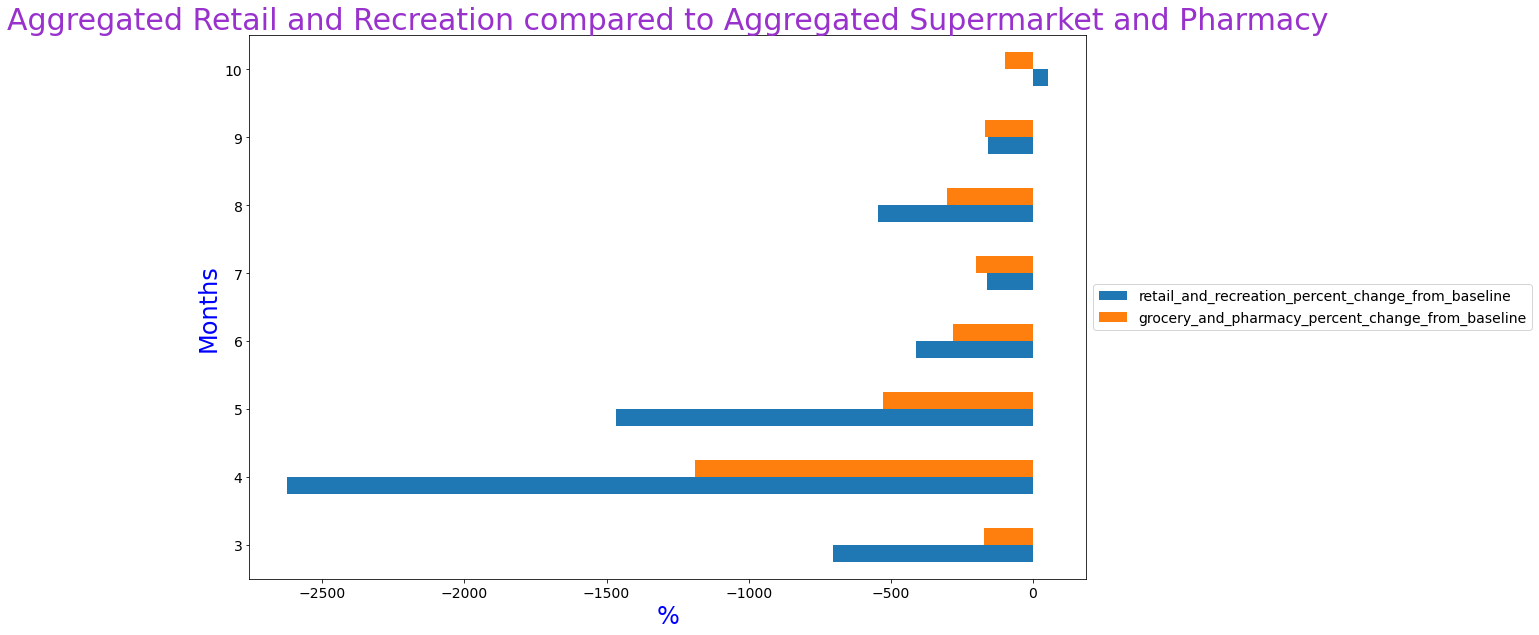

In [179]:
irishBarchart(df_nz_ret_rec_month,"Aggregated Retail and Recreation compared to Aggregated Supermarket and Pharmacy")

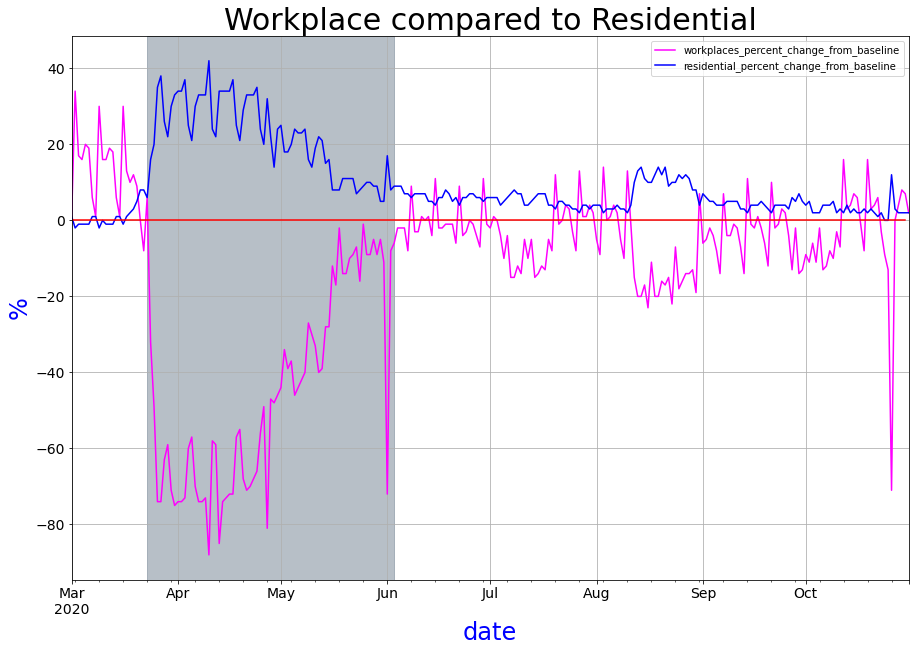

In [180]:
df_nz_wor_res=pd.concat([nz_workplaces_df,nz_residential_df], axis=1)
nzComparitiveLineGraph(df_nz_wor_res,"Workplace compared to Residential")

In [181]:
df_nz_wor_res_month=aggByMonth(df_nz_wor_res)
print("Workplace compared to Residential (Aggregated)")
df_nz_wor_res_month

Workplace compared to Residential (Aggregated)


workplaces_percent_change_from_baseline  \
date                                            
3                                      -205.0   
4                                     -1992.0   
5                                      -701.0   
6                                      -101.0   
7                                      -134.0   
8                                      -306.0   
9                                      -109.0   
10                                     -111.0   

      residential_percent_change_from_baseline  
date                                            
3                                        246.0  
4                                        886.0  
5                                        438.0  
6                                        205.0  
7                                        154.0  
8                                        250.0  
9                                        131.0  
10                                        88.0

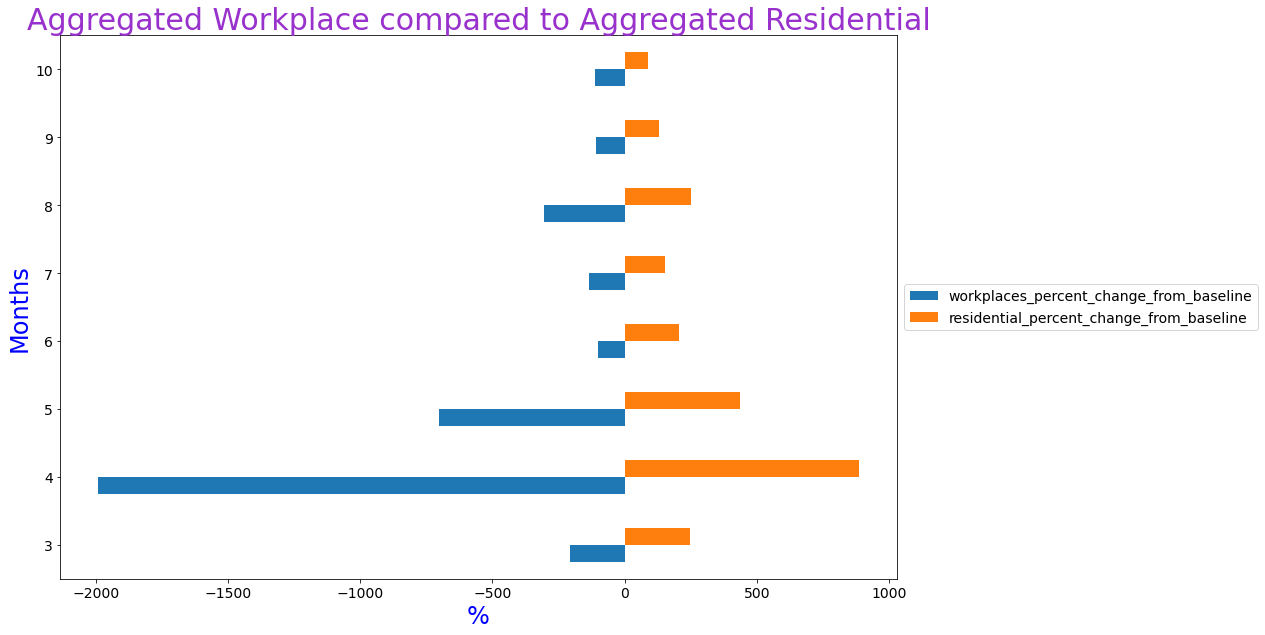

In [182]:
irishBarchart(df_nz_wor_res_month,"Aggregated Workplace compared to Aggregated Residential")

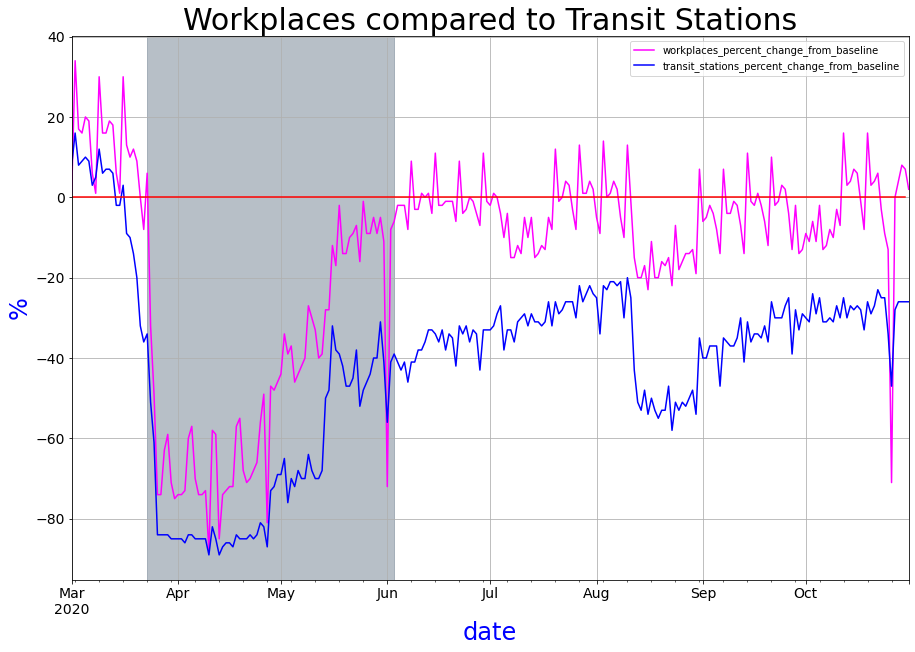

In [183]:
df_nz_wor_tra=pd.concat([nz_workplaces_df,nz_transport_df], axis=1)
nzComparitiveLineGraph(df_nz_wor_tra,"Workplaces compared to Transit Stations")

In [184]:
df_nz_wor_tra_month=aggByMonth(df_nz_wor_tra)
print("Workplace compared to Transit Stations (Aggregated)")
df_nz_wor_tra_month

Workplace compared to Transit Stations (Aggregated)


workplaces_percent_change_from_baseline  \
date                                            
3                                      -205.0   
4                                     -1992.0   
5                                      -701.0   
6                                      -101.0   
7                                      -134.0   
8                                      -306.0   
9                                      -109.0   
10                                     -111.0   

      transit_stations_percent_change_from_baseline  
date                                                 
3                                            -668.0  
4                                           -2511.0  
5                                           -1668.0  
6                                           -1129.0  
7                                            -904.0  
8                                           -1276.0  
9                                           -1024.0  
10                                           -885.0

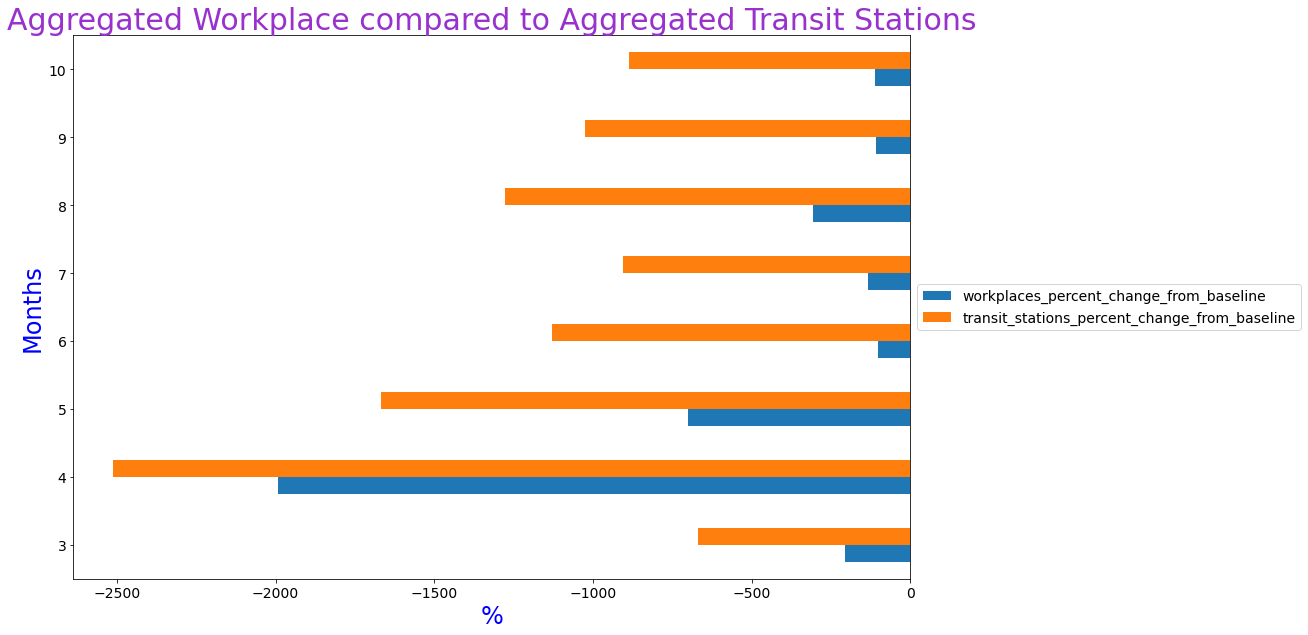

In [185]:
irishBarchart(df_nz_wor_tra_month, "Aggregated Workplace compared to Aggregated Transit Stations")

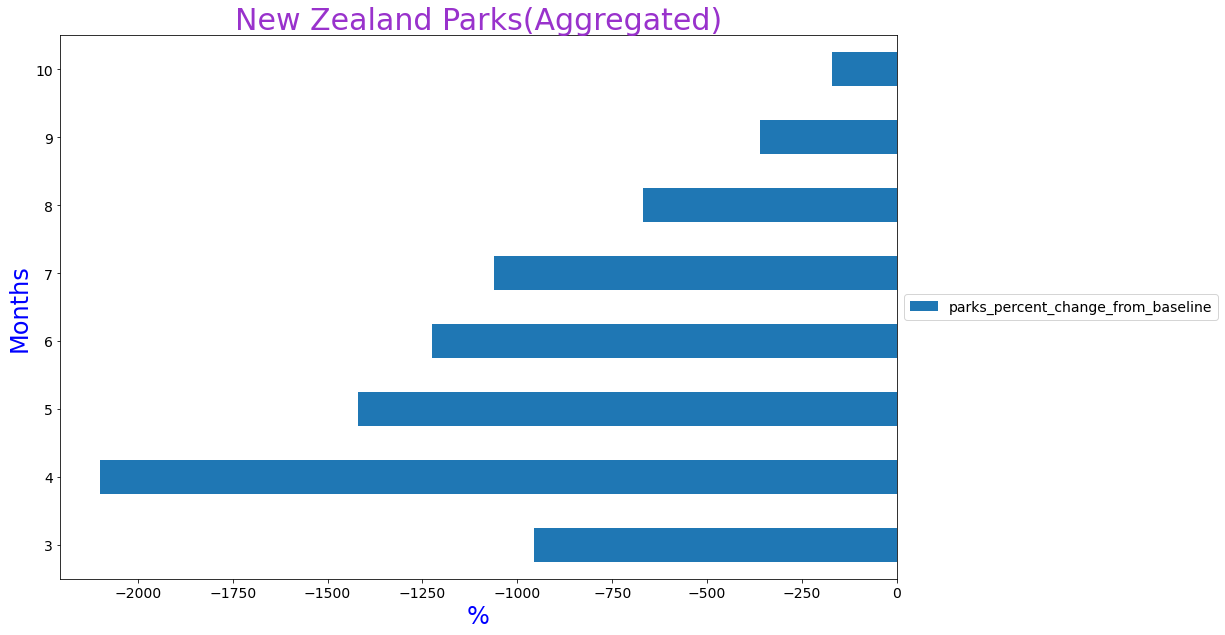

In [186]:
df_nz_per_month=aggByMonth(nz_parks_df)
irishBarchart(df_nz_per_month,"New Zealand Parks(Aggregated)")

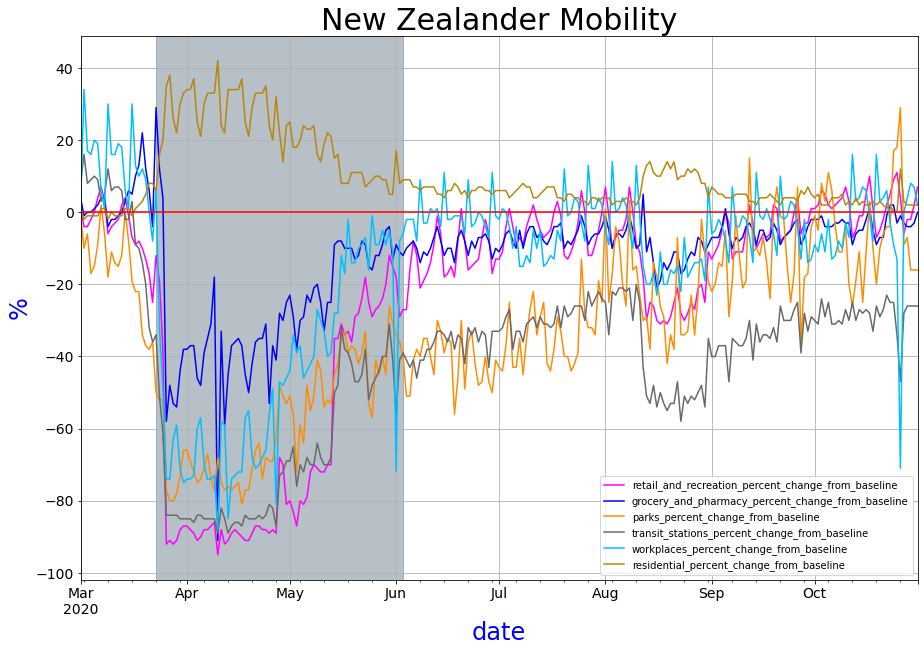

In [187]:
nzComparitiveLineGraph(df_new_zealand,"New Zealander Mobility")

# Head to Head

In [188]:
def combineDataSets(c1,c2,c3):
    df_combined = pd.concat( [c1,c2,c3], axis=1 )
    return df_combined

In [189]:
def compCountriesLineGraph(df,heading):
    ax = df.plot(figsize=(15, 10), fontsize=14, color=["seagreen","gold","dimgray"])
    ax.set_title(heading,fontsize=30, color="tomato")
    ax.set_xlabel('', fontsize=24,color="tomato")
    ax.set_ylabel('%', fontsize=24,color="tomato")
    fig=baseline_df.plot(ax=ax, color="r")
    plt.legend(["Ireland","Sweden","New Zealand"])
    plt.show()

In [190]:
def smoothedGraph(df,heading):
    ax = df.plot(figsize=(15, 10), fontsize=14, color=["seagreen","gold","dimgray"])
    ax.set_title(heading,fontsize=30, color="tomato")
    ax.set_xlabel('', fontsize=24,color="tomato")
    ax.set_ylabel('%', fontsize=24,color="tomato")
    fig=byMonth(baseline_df).plot(ax=ax, color="r")
    ax.text(6,1,"BASELINE",color="r")
    plt.legend(["Ireland","Sweden","New Zealand"])
    plt.xlim(left=3)
    plt.xlim(right=10)
    plt.grid()
    plt.show()
    

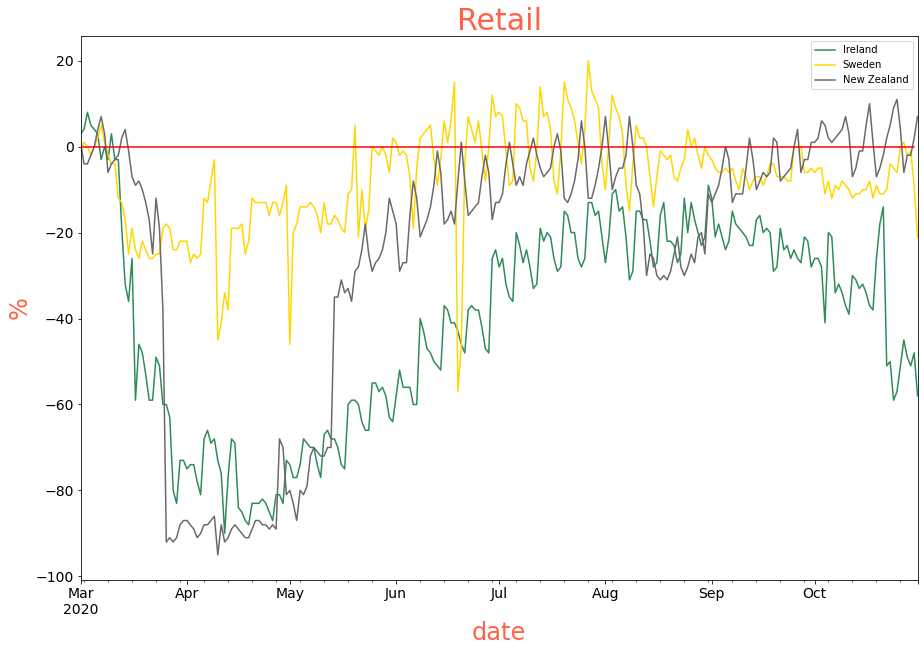

In [191]:
retail_comb=combineDataSets(irish_retail_df,swedish_retail_df,nz_retail_df)
compCountriesLineGraph(retail_comb, "Retail")

In [192]:
rolling_av_monthly_retail=meanByMonth(retail_comb)
rolling_av_monthly_retail

retail_and_recreation_percent_change_from_baseline  \
date                                                       
3                                            -32.612903    
4                                            -78.466667    
5                                            -66.451613    
6                                            -45.366667    
7                                            -23.806452    
8                                            -19.451613    
9                                            -21.533333    
10                                           -37.096774    

      retail_and_recreation_percent_change_from_baseline  \
date                                                       
3                                            -14.064516    
4                                            -19.500000    
5                                            -12.903226    
6                                             -2.900000    
7                                              3.806452    
8                                             -1.903226    
9                                             -5.866667    
10                                            -8.225806    

      retail_and_recreation_percent_change_from_baseline  
date                                                      
3                                            -22.709677   
4                                            -87.400000   
5                                            -47.354839   
6                                            -13.666667   
7                                             -5.193548   
8                                            -17.645161   
9                                             -5.333333   
10                                             1.741935

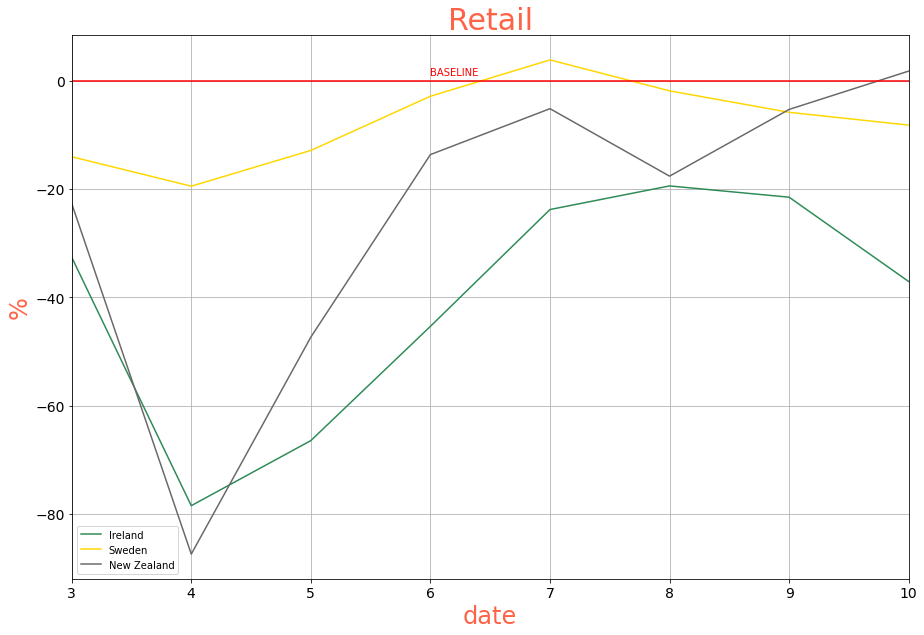

In [193]:
smoothedGraph(rolling_av_monthly_retail,"Retail")

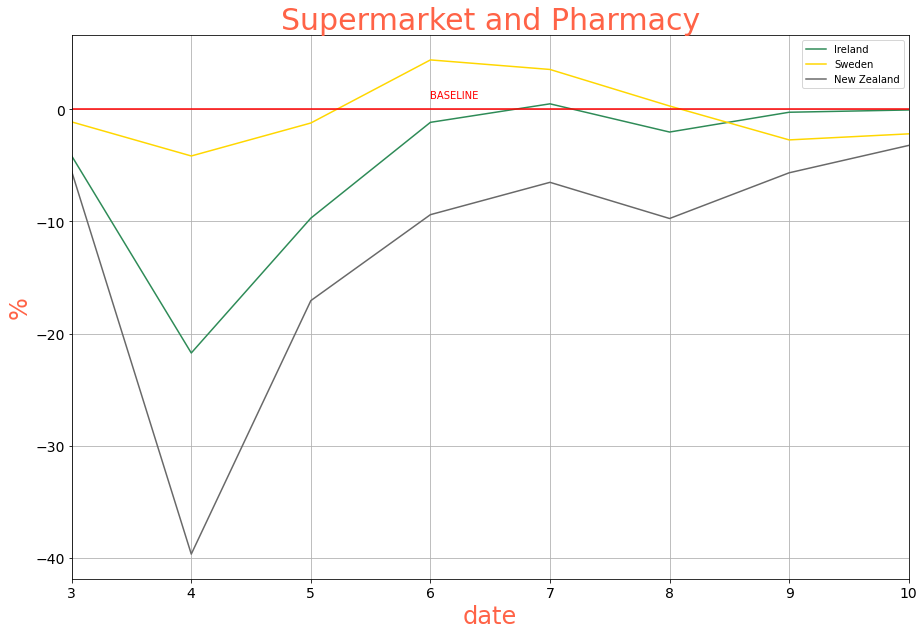

In [194]:
grocery_comb=combineDataSets(irish_grocery_df,swedish_grocery_df,nz_grocery_df)
rolling_av_monthly_grocery=meanByMonth(grocery_comb)
smoothedGraph(rolling_av_monthly_grocery,"Supermarket and Pharmacy")

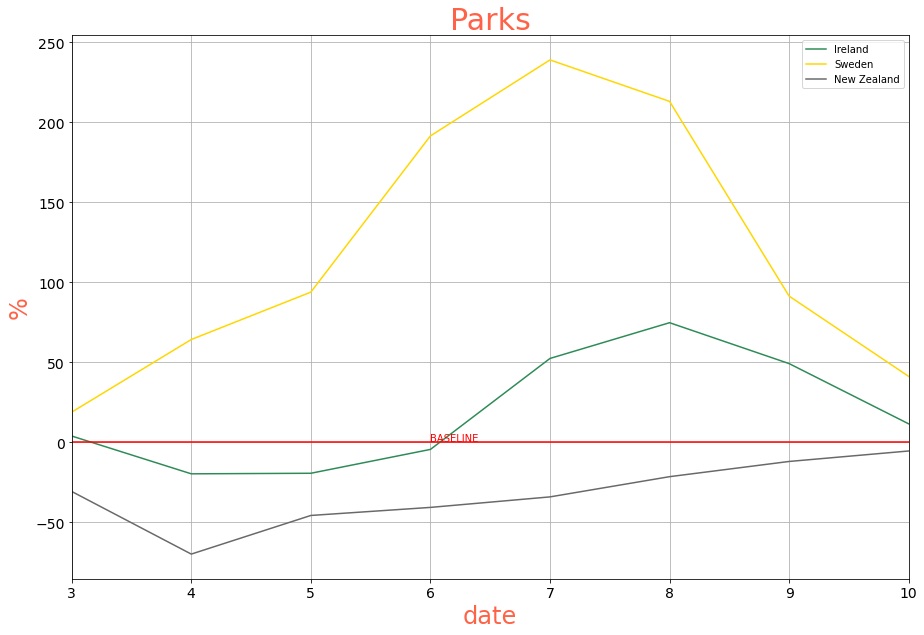

In [195]:
parks_comb=combineDataSets(irish_parks_df,swedish_parks_df,nz_parks_df)
rolling_av_monthly_parks=meanByMonth(parks_comb)
smoothedGraph(rolling_av_monthly_parks,"Parks")

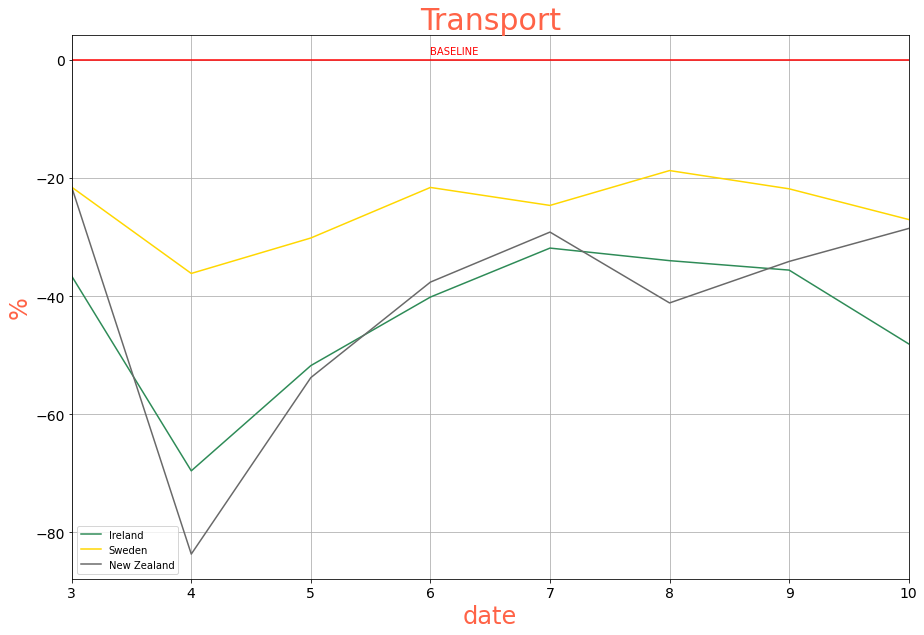

In [196]:
transport_comb=combineDataSets(irish_transport_df,swedish_transport_df,nz_transport_df)
rolling_av_monthly_transport=meanByMonth(transport_comb)
smoothedGraph(rolling_av_monthly_transport,"Transport")

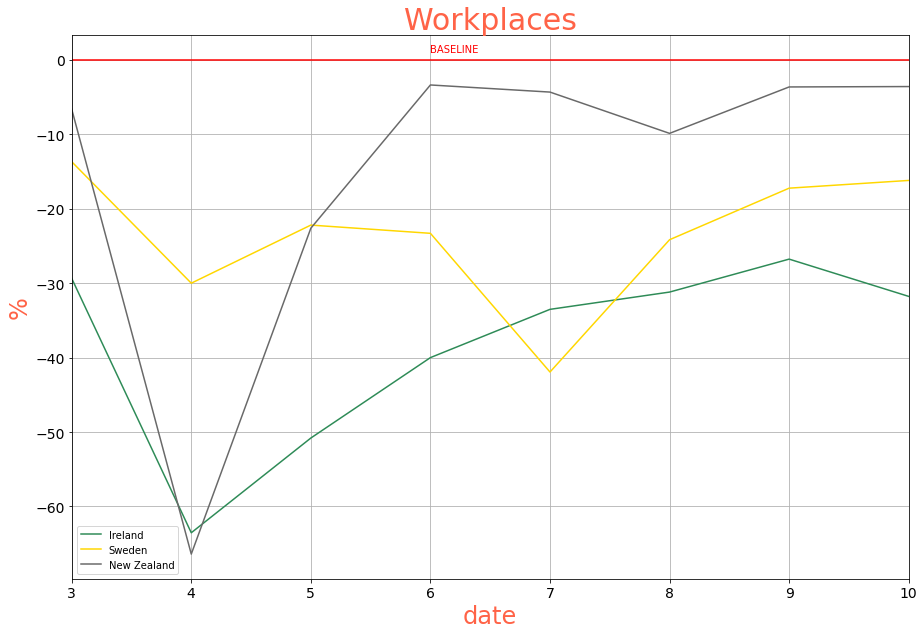

In [197]:
workplaces_comb=combineDataSets(irish_workplaces_df,swedish_workplaces_df,nz_workplaces_df)
rolling_av_monthly_workplaces=meanByMonth(workplaces_comb)
smoothedGraph(rolling_av_monthly_workplaces,"Workplaces")

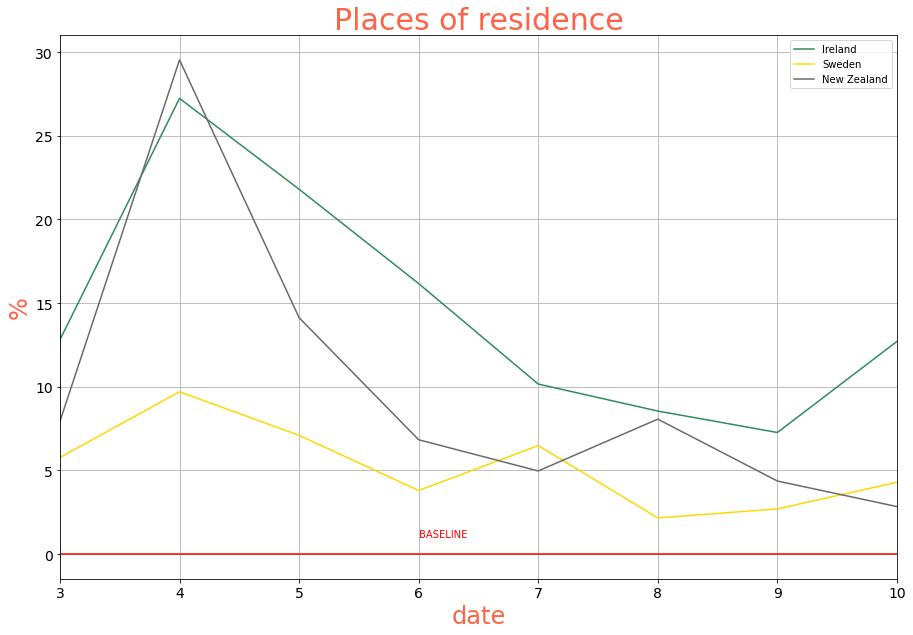

In [198]:
residential_comb=combineDataSets(irish_residential_df,swedish_residential_df,nz_residential_df)
rolling_av_monthly_residential=meanByMonth(residential_comb)
smoothedGraph(rolling_av_monthly_residential,"Places of residence")